<a href="https://colab.research.google.com/github/lreinosoh/Anexos_PG/blob/main/Anexo_E_NB_Proyecto_Grado_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
datos.shape

(44575, 42)

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
8819,SI,2023-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,4.8,3.74,1027400630,NaN,0.0,5.0,1,N,4.31,4.06
8820,SI,2023-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,4.5,4.58,1031421201,NaN,0.0,5.0,1,N,4.51,4.49
8821,SI,2023-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,4.6,4.31,1031646176,NaN,0.0,5.0,1,N,4.49,4.29
8822,SI,2023-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,4.5,4.13,1012333701,NaN,0.0,5.0,1,N,4.16,4.27
8823,SI,2023-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,3.1,3.00,1117487653,NaN,0.0,5.0,1,N,2.26,2.94


In [ ]:
datos1.shape

(8824, 15)

**INGENIERIA DE SOFTWARE I**

In [ ]:
IS_I = datos1[(datos1['CÓDIGO'] == 43390850) & (datos1['PERIODO'] != '2023-02')]
IS_I.shape

(306, 15)

In [ ]:
IS_I.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     19
NOTA DEFINITIVA PREREQUISITO 2    306
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                 17
PROMEDIO PARCIAL                    0
DEFINITIVA                         25
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 18
PROMEDIO ACUMULADO                 18
dtype: int64

In [ ]:
IS_I = IS_I.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)

IS_I = IS_I.dropna()

In [ ]:
IS_I.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 675 to 6541
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       251 non-null    object 
 1   PERIODO                         251 non-null    object 
 2   CARRERA                         251 non-null    object 
 3   CÓDIGO                          251 non-null    int64  
 4   ASIGNATURA                      251 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  251 non-null    float64
 6   DOCUMENTO ESTUDIANTE            251 non-null    int64  
 7   NOTAS PRIMER CORTE              251 non-null    float64
 8   PROMEDIO PARCIAL                251 non-null    float64
 9   DEFINITIVA                      251 non-null    float64
 10  CALIFICACIÓN                    251 non-null    int64  
 11  ASIGNATURA ANULADA              251 non-null    object 
 12  PROMEDIO SEMESTRAL              251 no

In [ ]:
X = IS_I[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = IS_I['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(251, 3) (251,)
(200, 3) (200,)
(51, 3) (51,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.8823529411764706
Precision score:  0.9361702127659575
Recall score:  0.9361702127659575
F1 score:  0.9361702127659575


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 1  3]
 [ 3 44]]

Classification Report

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.94      0.94      0.94        47

    accuracy                           0.88        51
   macro avg       0.59      0.59      0.59        51
weighted avg       0.88      0.88      0.88        51



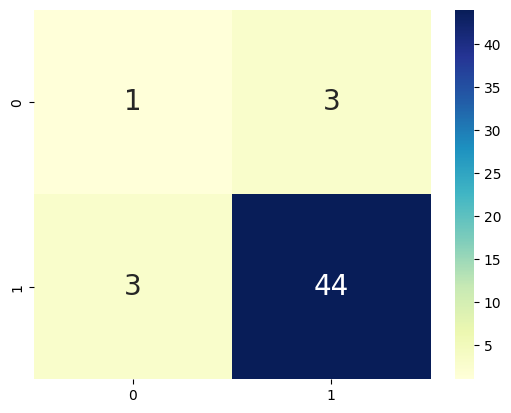

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
IS_I2 = datos1[(datos1['CÓDIGO'] == 43390850) & (datos1['PERIODO'] == '2023-02')]
IS_I2 = IS_I2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
IS_I2 = IS_I2.dropna()


X_nuevos = IS_I2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoIS_I2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoIS_I2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        58
1  No Aprobado         5


**SISTEMAS OPERATIVOS**

In [ ]:
SO = datos1[(datos1['CÓDIGO'] == 43390851) & (datos1['PERIODO'] != '2023-02')]
SO.shape

(294, 15)

In [ ]:
SO.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
395,SI,2018-02,INGENIERÍA DE SISTEMAS,43390851,SISTEMAS OPERATIVOS,NaN,NaN,1022440480,4.0,4.00,3.60,1,N,NaN,NaN
396,SI,2018-02,INGENIERÍA DE SISTEMAS,43390851,SISTEMAS OPERATIVOS,NaN,NaN,1000154513,4.0,4.00,4.20,1,N,4.27,4.06
397,SI,2018-02,INGENIERÍA DE SISTEMAS,43390851,SISTEMAS OPERATIVOS,NaN,NaN,1233502105,4.5,4.25,4.35,1,N,NaN,NaN
398,SI,2018-02,INGENIERÍA DE SISTEMAS,43390851,SISTEMAS OPERATIVOS,NaN,NaN,1032495708,4.0,3.75,3.65,1,N,NaN,NaN
399,SI,2018-02,INGENIERÍA DE SISTEMAS,43390851,SISTEMAS OPERATIVOS,NaN,NaN,1010243549,4.5,4.25,4.35,1,N,4.20,3.75


In [ ]:
SO.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     37
NOTA DEFINITIVA PREREQUISITO 2    294
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  8
PROMEDIO PARCIAL                    0
DEFINITIVA                         15
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 14
PROMEDIO ACUMULADO                 14
dtype: int64

In [ ]:
SO = SO.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)

SO = SO.dropna()

SO.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 697 to 6599
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       238 non-null    object 
 1   PERIODO                         238 non-null    object 
 2   CARRERA                         238 non-null    object 
 3   CÓDIGO                          238 non-null    int64  
 4   ASIGNATURA                      238 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  238 non-null    float64
 6   DOCUMENTO ESTUDIANTE            238 non-null    int64  
 7   NOTAS PRIMER CORTE              238 non-null    float64
 8   PROMEDIO PARCIAL                238 non-null    float64
 9   DEFINITIVA                      238 non-null    float64
 10  CALIFICACIÓN                    238 non-null    int64  
 11  ASIGNATURA ANULADA              238 non-null    object 
 12  PROMEDIO SEMESTRAL              238 no

In [ ]:
X = SO[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = SO['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(238, 3) (238,)
(190, 3) (190,)
(48, 3) (48,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9791666666666666
Precision score:  0.9791666666666666
Recall score:  1.0
F1 score:  0.9894736842105264


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 0  1]
 [ 0 47]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        47

    accuracy                           0.98        48
   macro avg       0.49      0.50      0.49        48
weighted avg       0.96      0.98      0.97        48



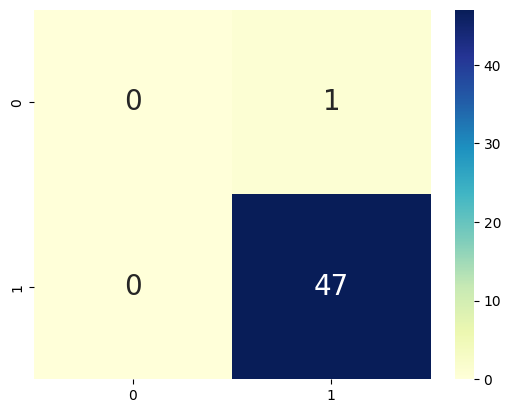

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
SO2 = datos1[(datos1['CÓDIGO'] == 43390851) & (datos1['PERIODO'] == '2023-02')]
SO2 = SO2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
SO2 = SO2.dropna()


X_nuevos = SO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoSO2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoSO2)




Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        64
1  No Aprobado         1


**ANALISIS DE ALGORITMOS**

In [ ]:
AA = datos1[(datos1['CÓDIGO'] == 43390852) & (datos1['PERIODO'] != '2023-02')]
AA.shape

(232, 15)

In [ ]:
AA.isnull().sum()


PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     13
NOTA DEFINITIVA PREREQUISITO 2    232
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  5
PROMEDIO PARCIAL                    0
DEFINITIVA                         10
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 14
PROMEDIO ACUMULADO                 14
dtype: int64

In [ ]:
AA = AA.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
AA = AA.dropna()
AA.info()


<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1506 to 6638
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       198 non-null    object 
 1   PERIODO                         198 non-null    object 
 2   CARRERA                         198 non-null    object 
 3   CÓDIGO                          198 non-null    int64  
 4   ASIGNATURA                      198 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  198 non-null    float64
 6   DOCUMENTO ESTUDIANTE            198 non-null    int64  
 7   NOTAS PRIMER CORTE              198 non-null    float64
 8   PROMEDIO PARCIAL                198 non-null    float64
 9   DEFINITIVA                      198 non-null    float64
 10  CALIFICACIÓN                    198 non-null    int64  
 11  ASIGNATURA ANULADA              198 non-null    object 
 12  PROMEDIO SEMESTRAL              198 n

In [ ]:
X = AA[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = AA['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(198, 3) (198,)
(158, 3) (158,)
(40, 3) (40,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 1  0]
 [ 0 39]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        39

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



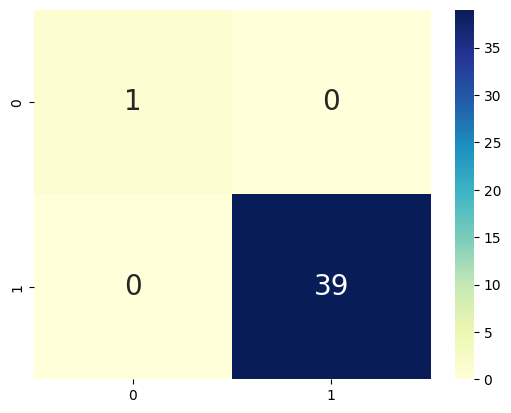

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
AA2 = datos1[(datos1['CÓDIGO'] == 43390852) & (datos1['PERIODO'] == '2023-02')]
AA2 = AA2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
AA2 = AA2.dropna()


X_nuevos = AA2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
#tabla_conteoAA2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

#print(tabla_conteoAA2)

print(resultados.value_counts())



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicción
1             50
Name: count, dtype: int64


**INGENIERIA DE SOFTWARE II**

In [ ]:
IS_II = datos1[(datos1['CÓDIGO'] == 43390853) & (datos1['PERIODO'] != '2023-02')]
IS_II.shape

(226, 15)

In [ ]:
IS_II.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1      7
NOTA DEFINITIVA PREREQUISITO 2    226
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  4
PROMEDIO PARCIAL                    0
DEFINITIVA                          8
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 15
PROMEDIO ACUMULADO                 15
dtype: int64

In [ ]:
IS_II = IS_II.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
IS_II = IS_II.dropna()
IS_II.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1086 to 6676
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       199 non-null    object 
 1   PERIODO                         199 non-null    object 
 2   CARRERA                         199 non-null    object 
 3   CÓDIGO                          199 non-null    int64  
 4   ASIGNATURA                      199 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  199 non-null    float64
 6   DOCUMENTO ESTUDIANTE            199 non-null    int64  
 7   NOTAS PRIMER CORTE              199 non-null    float64
 8   PROMEDIO PARCIAL                199 non-null    float64
 9   DEFINITIVA                      199 non-null    float64
 10  CALIFICACIÓN                    199 non-null    int64  
 11  ASIGNATURA ANULADA              199 non-null    object 
 12  PROMEDIO SEMESTRAL              199 n

In [ ]:
X = IS_II[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = IS_II['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199, 3) (199,)
(159, 3) (159,)
(40, 3) (40,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.95
Precision score:  0.9473684210526315
Recall score:  1.0
F1 score:  0.972972972972973


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 2  2]
 [ 0 36]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.95      1.00      0.97        36

    accuracy                           0.95        40
   macro avg       0.97      0.75      0.82        40
weighted avg       0.95      0.95      0.94        40



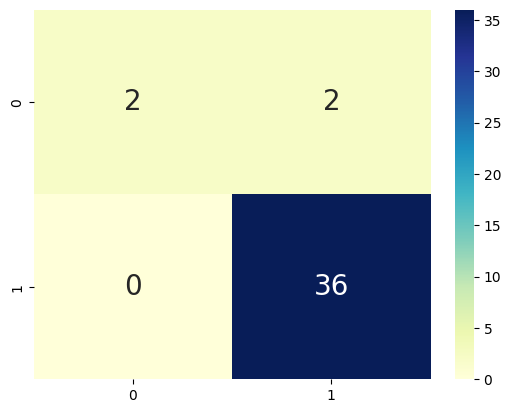

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
IS_II2 = datos1[(datos1['CÓDIGO'] == 43390853) & (datos1['PERIODO'] == '2023-02')]
IS_II2 = IS_II2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
IS_II2 = IS_II2.dropna()


X_nuevos = IS_II2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoIS_II2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoIS_II2)




Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
     Resultado  Cantidad
0     Aprobado        33
1  No Aprobado         2


**SEÑALES Y COMUNICACIONES**

In [ ]:
SC = datos1[(datos1['CÓDIGO'] == 43390855) & (datos1['PERIODO'] != '2023-02')]
SC.shape

(239, 15)

In [ ]:
SC.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     17
NOTA DEFINITIVA PREREQUISITO 2    239
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  6
PROMEDIO PARCIAL                    0
DEFINITIVA                          9
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 13
PROMEDIO ACUMULADO                 13
dtype: int64

In [ ]:
SC = SC.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
SC = SC.dropna()
SC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1094 to 6718
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       202 non-null    object 
 1   PERIODO                         202 non-null    object 
 2   CARRERA                         202 non-null    object 
 3   CÓDIGO                          202 non-null    int64  
 4   ASIGNATURA                      202 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  202 non-null    float64
 6   DOCUMENTO ESTUDIANTE            202 non-null    int64  
 7   NOTAS PRIMER CORTE              202 non-null    float64
 8   PROMEDIO PARCIAL                202 non-null    float64
 9   DEFINITIVA                      202 non-null    float64
 10  CALIFICACIÓN                    202 non-null    int64  
 11  ASIGNATURA ANULADA              202 non-null    object 
 12  PROMEDIO SEMESTRAL              202 n

In [ ]:
X = SC[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = SC['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(202, 3) (202,)
(161, 3) (161,)
(41, 3) (41,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Imprimir los resultados con dos decimales correctamente
print('Accuracy score: {:.2f}'.format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: {:.2f}'.format(precision_score(y_test, y_pred_NB)))
print('Recall score: {:.2f}'.format(recall_score(y_test, y_pred_NB)))
print('F1 score: {:.2f}'.format(f1_score(y_test, y_pred_NB)))

NameError: name 'y_test' is not defined

In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 0  1]
 [ 0 40]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        40

    accuracy                           0.98        41
   macro avg       0.49      0.50      0.49        41
weighted avg       0.95      0.98      0.96        41



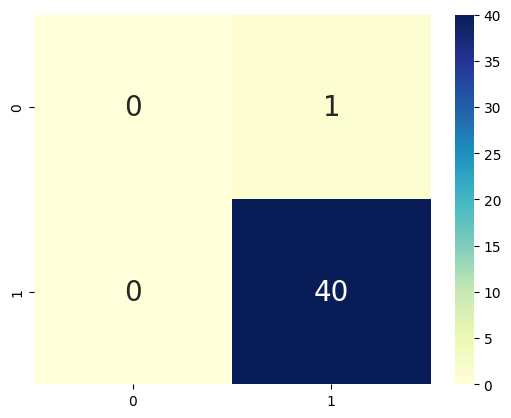

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
SC2 = datos1[(datos1['CÓDIGO'] == 43390855) & (datos1['PERIODO'] == '2023-02')]
SC2 = SC2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
SC2 = SC2.dropna()


X_nuevos = SC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
#tabla_conteoSC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

#print(tabla_conteoSC2)
print(resultados.value_counts())


Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
Predicción
1             41
Name: count, dtype: int64


**INTELIGENCIA ARTIFICIAL**

In [ ]:
IA = datos1[(datos1['CÓDIGO'] == 40050168) & (datos1['PERIODO'] != '2023-02')]
IA.shape

(540, 15)

In [ ]:
IA.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1    187
NOTA DEFINITIVA PREREQUISITO 2     96
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  3
PROMEDIO PARCIAL                    0
DEFINITIVA                         16
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                110
PROMEDIO ACUMULADO                110
dtype: int64

In [ ]:
#IA = IA.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
IA = IA.dropna()
IA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 66 to 5986
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       267 non-null    object 
 1   PERIODO                         267 non-null    object 
 2   CARRERA                         267 non-null    object 
 3   CÓDIGO                          267 non-null    int64  
 4   ASIGNATURA                      267 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  267 non-null    float64
 6   NOTA DEFINITIVA PREREQUISITO 2  267 non-null    float64
 7   DOCUMENTO ESTUDIANTE            267 non-null    int64  
 8   NOTAS PRIMER CORTE              267 non-null    float64
 9   PROMEDIO PARCIAL                267 non-null    float64
 10  DEFINITIVA                      267 non-null    float64
 11  CALIFICACIÓN                    267 non-null    int64  
 12  ASIGNATURA ANULADA              267 non

In [ ]:
X = IA[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = IA['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(267, 3) (267,)
(213, 3) (213,)
(54, 3) (54,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.7962962962962963
Precision score:  0.8888888888888888
Recall score:  0.8695652173913043
F1 score:  0.8791208791208792


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 3  5]
 [ 6 40]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       0.33      0.38      0.35         8
           1       0.89      0.87      0.88        46

    accuracy                           0.80        54
   macro avg       0.61      0.62      0.62        54
weighted avg       0.81      0.80      0.80        54



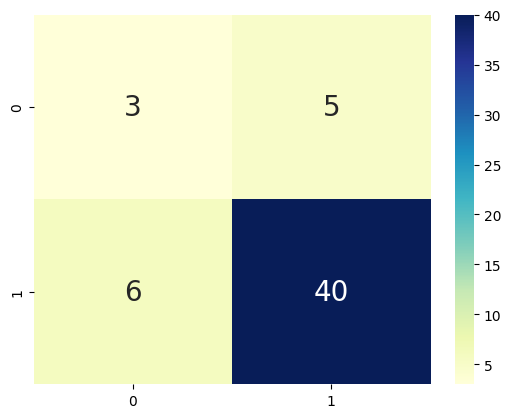

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
IA2 = datos1[(datos1['CÓDIGO'] == 40050168) & (datos1['PERIODO'] == '2023-02')]
IA2 = IA2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
IA2 = IA2.dropna()


X_nuevos = IA2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoIA2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoIA2)

NameError: name 'datos1' is not defined

NameError: name 'IA2' is not defined

**ARQUITECTURA DE SISTEMAS I**

In [ ]:
AS_I = datos1[(datos1['CÓDIGO'] == 43390856) & (datos1['PERIODO'] != '2023-02')]
AS_I.shape

#AS_I.isnull().sum()

(205, 15)

In [ ]:
AS_I = AS_I.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
AS_I = AS_I.dropna()
AS_I.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 1570 to 6759
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       171 non-null    object 
 1   PERIODO                         171 non-null    object 
 2   CARRERA                         171 non-null    object 
 3   CÓDIGO                          171 non-null    int64  
 4   ASIGNATURA                      171 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  171 non-null    float64
 6   DOCUMENTO ESTUDIANTE            171 non-null    int64  
 7   NOTAS PRIMER CORTE              171 non-null    float64
 8   PROMEDIO PARCIAL                171 non-null    float64
 9   DEFINITIVA                      171 non-null    float64
 10  CALIFICACIÓN                    171 non-null    int64  
 11  ASIGNATURA ANULADA              171 non-null    object 
 12  PROMEDIO SEMESTRAL              

In [ ]:
X = AS_I[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = AS_I['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(171, 3) (171,)
(136, 3) (136,)
(35, 3) (35,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.8285714285714286
Precision score:  0.8928571428571429
Recall score:  0.8928571428571429
F1 score:  0.8928571428571429


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 4  3]
 [ 3 25]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.89      0.89      0.89        28

    accuracy                           0.83        35
   macro avg       0.73      0.73      0.73        35
weighted avg       0.83      0.83      0.83        35



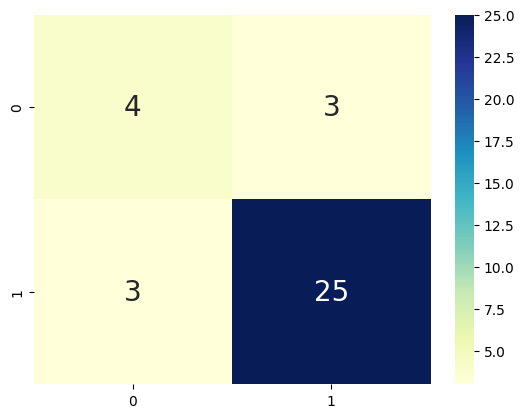

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
AS_I2 = datos1[(datos1['CÓDIGO'] == 43390856) & (datos1['PERIODO'] == '2023-02')]
AS_I2 = AS_I2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
AS_I2 = AS_I2.dropna()


X_nuevos = AS_I2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoAS_I2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoAS_I2)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        39
1  No Aprobado         2


**PRACTICA DE INGENIERIA III**

In [ ]:
PI_III = datos1[(datos1['CÓDIGO'] == 43390857) & (datos1['PERIODO'] != '2023-02')]
PI_III.shape

(202, 16)

In [ ]:
PI_III.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     12
NOTA DEFINITIVA PREREQUISITO 2     16
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                197
PROMEDIO PARCIAL                    0
DEFINITIVA                          9
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 13
PROMEDIO ACUMULADO                 13
TOTAL_MATRICULADOS                  0
dtype: int64

In [ ]:
PI_III = PI_III.drop('NOTAS PRIMER CORTE', axis = 1)
PI_III = PI_III.dropna()
PI_III.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 1106 to 6804
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       165 non-null    object 
 1   PERIODO                         165 non-null    object 
 2   CARRERA                         165 non-null    object 
 3   CÓDIGO                          165 non-null    int64  
 4   ASIGNATURA                      165 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  165 non-null    float64
 6   NOTA DEFINITIVA PREREQUISITO 2  165 non-null    float64
 7   DOCUMENTO ESTUDIANTE            165 non-null    int64  
 8   PROMEDIO PARCIAL                165 non-null    float64
 9   DEFINITIVA                      165 non-null    float64
 10  CALIFICACIÓN                    165 non-null    int64  
 11  ASIGNATURA ANULADA              165 non-null    object 
 12  PROMEDIO SEMESTRAL              

In [ ]:
X = PI_III[['PROMEDIO ACUMULADO', 'NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = PI_III['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(165, 3) (165,)
(132, 3) (132,)
(33, 3) (33,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9696969696969697
Precision score:  0.96875
Recall score:  1.0
F1 score:  0.9841269841269841


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 1  1]
 [ 0 31]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.97      1.00      0.98        31

    accuracy                           0.97        33
   macro avg       0.98      0.75      0.83        33
weighted avg       0.97      0.97      0.96        33



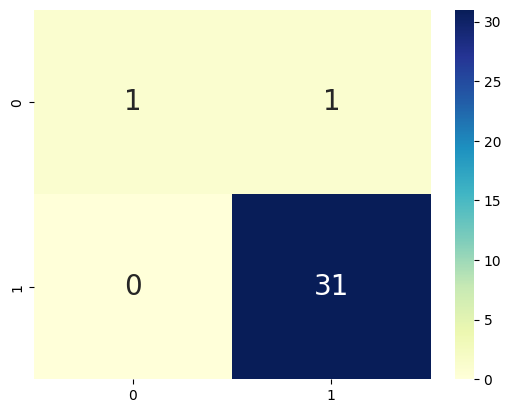

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

NUEVOS DATOS

In [ ]:
PI_III2 = datos1[(datos1['CÓDIGO'] == 43390857) & (datos1['PERIODO'] == '2023-02')]
PI_III2 = PI_III2.drop('NOTAS PRIMER CORTE', axis = 1)
PI_III2 = PI_III2.dropna()


X_nuevos = PI_III2[['PROMEDIO ACUMULADO', 'NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPI_III2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPI_III2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        35
1  No Aprobado         1


POO

In [ ]:
POO = datos1[(datos1['CÓDIGO'] == 43390843) & (datos1['PERIODO'] != '2023-02')]
POO.shape

(822, 16)

In [ ]:
POO.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    78
NOTA DEFINITIVA PREREQUISITO 2    69
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                41
PROMEDIO PARCIAL                   0
DEFINITIVA                        82
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO = POO.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
POO = POO.dropna()
POO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 206 to 6129
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       661 non-null    object 
 1   PERIODO                         661 non-null    object 
 2   CARRERA                         661 non-null    object 
 3   CÓDIGO                          661 non-null    int64  
 4   ASIGNATURA                      661 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  661 non-null    float64
 6   DOCUMENTO ESTUDIANTE            661 non-null    int64  
 7   NOTAS PRIMER CORTE              661 non-null    float64
 8   PROMEDIO PARCIAL                661 non-null    float64
 9   DEFINITIVA                      661 non-null    float64
 10  CALIFICACIÓN                    661 non-null    int64  
 11  ASIGNATURA ANULADA              661 non-null    object 
 12  PROMEDIO SEMESTRAL              6

In [ ]:
POO.shape

(661, 15)

In [ ]:
X = POO[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = POO['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(661, 3) (661,)
(528, 3) (528,)
(133, 3) (133,)


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.8646616541353384
Precision score:  0.8584905660377359
Recall score:  0.9680851063829787
F1 score:  0.91


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[24 15]
 [ 3 91]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))


Classification Report

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        39
           1       0.86      0.97      0.91        94

    accuracy                           0.86       133
   macro avg       0.87      0.79      0.82       133
weighted avg       0.87      0.86      0.86       133



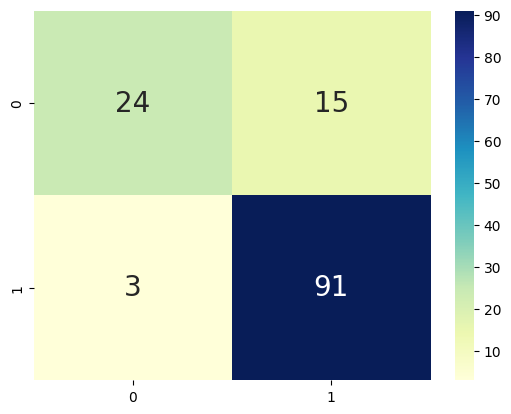

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
POO2 = datos1[(datos1['CÓDIGO'] == 43390843) & (datos1['PERIODO'] == '2023-02')]
POO2 = POO2.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
POO2 = POO2.dropna()


X_nuevos = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPOO2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPOO2)




Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        99
1  No Aprobado         6


In [ ]:
resultados_nb = pd.DataFrame({"Real":[36,82,30,35,37,61,80,86,42,62,42,42,90,33,69,90,108,94,31,55,71,56,107,112],"Prediccion":[21,70,21,27,30,55,76,82,39,60,41,42,92,35,72,97,117,104,42,90,151,137,198,207]}); resultados_nb

,Real,Prediccion
0,36,21
1,82,70
2,30,21
3,35,27
4,37,30
5,61,55
6,80,76
7,86,82
8,42,39
9,62,60


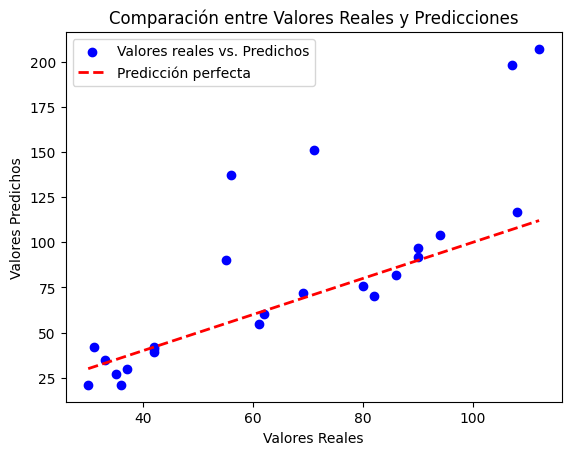

In [ ]:
# Supongamos que tienes los valores reales y predichos almacenados en las listas y_real y y_pred
y_real = [36,82,30,35,37,61,80,86,42,62,42,42,90,33,69,90,108,94,31,55,71,56,107,112]  # Ejemplo, reemplaza con tus datos reales
y_pred = [21,70,21,27,30,55,76,82,39,60,41,42,92,35,72,97,117,104,42,90,151,137,198,207]  # Ejemplo, reemplaza con tus datos predichos

# Crear un gráfico de dispersión
plt.scatter(y_real, y_pred, color='blue', marker='o', label='Valores reales vs. Predichos')

# Agregar una línea diagonal para visualizar la igualdad
plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle='--', color='red', linewidth=2, label='Predicción perfecta')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predicciones')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: ARQUITECTURA DE SISTEMAS II

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
ASII= datos3 [(datos3 ['CÓDIGO'] == 43390859) & (datos3 ['PERIODO'] != '2023-02')]
ASII.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
6873,SI,2023-01,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,3.94,1020815716,4.0,4.1,1,N,3.97,3.60,1
6874,SI,2023-01,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,3.81,1010248096,NaN,0.0,0,S,4.28,4.30,1
6875,SI,2023-01,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,2.87,1033820689,5.0,5.0,1,N,4.74,4.06,1
6876,SI,2023-01,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,2.86,1013692387,5.0,5.0,1,N,4.93,3.88,1
6877,SI,2023-01,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,2.88,1000506838,5.0,5.0,1,N,4.94,3.81,1


In [ ]:
ASII.shape

(115, 14)

In [ ]:
ASII.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     9
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ASII= ASII.dropna()

In [ ]:
ASII.shape

(93, 14)

In [ ]:
X = ASII[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ASII['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(93, 3) (93,)
(74, 3) (74,)
(19, 3) (19,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[19]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



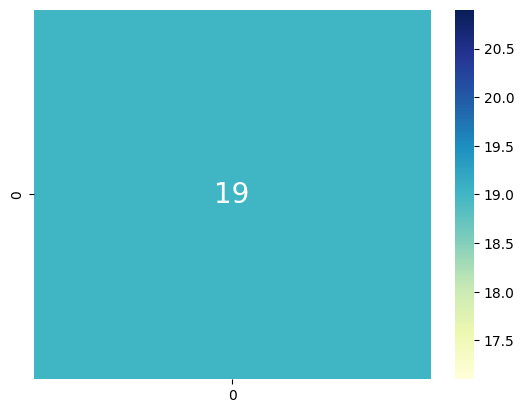

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
ASII2 = datos3[(datos3['CÓDIGO'] == 43390859) & (datos3['PERIODO'] == '2023-02')].copy()

ASII2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    2
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ASII2 = ASII2.dropna()
ASII2.shape

(46, 14)

In [ ]:
X = ASII2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ASII2['CALIFICACIÓN']

X_nuevos = ASII2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoASII2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoASII2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        44
1  No Aprobado         2


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: CIBERSEGURIDAD

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
CB= datos3 [(datos3 ['CÓDIGO'] == 43390863) & (datos3 ['PERIODO'] != '2023-02')]
CB.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
7004,SI,2023-01,INGENIERÍA DE SISTEMAS,43390863,CIBERSEGURIDAD,4.82,1014302656,4.1,4.25,1,N,4.11,4.27,1
7005,SI,2023-01,INGENIERÍA DE SISTEMAS,43390863,CIBERSEGURIDAD,4.26,1136889361,3.6,3.50,1,N,4.10,3.75,1
7006,SI,2023-01,INGENIERÍA DE SISTEMAS,43390863,CIBERSEGURIDAD,4.72,1000319491,3.7,3.65,1,N,4.43,4.26,1
7007,SI,2023-01,INGENIERÍA DE SISTEMAS,43390863,CIBERSEGURIDAD,4.12,1001097809,4.1,4.25,1,N,3.97,3.79,1
7008,SI,2023-01,INGENIERÍA DE SISTEMAS,43390863,CIBERSEGURIDAD,4.50,1001204183,3.7,3.85,1,N,4.41,4.22,1


In [ ]:
CB.shape

(100, 14)

In [ ]:
CB.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    13
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
CB= CB.dropna()

In [ ]:
CB.shape

(76, 14)

In [ ]:
X = CB[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = CB['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(76, 3) (76,)
(60, 3) (60,)
(16, 3) (16,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[16]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



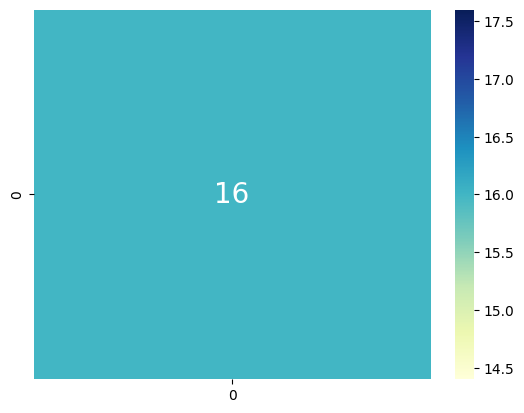

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
CB2 = datos3[(datos3['CÓDIGO'] == 43390863) & (datos3['PERIODO'] == '2023-02')].copy()

CB2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    7
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
CB2 = CB2.dropna()
CB2.shape

(29, 14)

In [ ]:
X = CB2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = CB2['CALIFICACIÓN']

X_nuevos = CB2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones y asignar un índice numérico
resultados = pd.DataFrame({'Predicción': y_pred_nuevos}, index=X_nuevos.index)

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoCB2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoCB2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        29
1  No Aprobado         0


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V3.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,8.824000e+03,8035.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.341811e+07,3.742055,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.633119e+05,0.810231,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.330000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339085e+07,3.850000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.300000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 14)

##MODELO APLICADO A: PROGRAMACIÓN ORIENTADA A OBJETOS

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
POO= datos3 [(datos3 ['CÓDIGO'] == 43390843) & (datos3 ['PERIODO'] != '2023-02')]
POO.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,NaN,NaN,1013692387,2.5,2.50,2.50,0,N,4.93,3.88,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.40,3.1,1193548613,4.5,4.00,3.60,1,N,4.09,3.87,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.05,3.9,1001083571,4.0,3.75,3.45,1,N,NaN,NaN,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.00,3.2,1024602262,3.0,2.25,2.35,0,N,1.61,2.69,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,4.25,3.5,1014304950,3.0,3.25,3.15,1,N,4.22,3.68,1


In [ ]:
POO.shape

(822, 16)

In [ ]:
POO.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    78
NOTA DEFINITIVA PREREQUISITO 2    69
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                41
PROMEDIO PARCIAL                   0
DEFINITIVA                        82
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO= POO.dropna()

In [ ]:
POO.shape

(654, 16)

In [ ]:
X = POO[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = POO['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(654, 4) (654,)
(523, 4) (523,)
(131, 4) (131,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.7938931297709924
Precision score:  0.8113207547169812
Recall score:  0.9247311827956989
F1 score:  0.8643216080402009


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[18 20]
 [ 7 86]]

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.81      0.92      0.86        93

    accuracy                           0.79       131
   macro avg       0.77      0.70      0.72       131
weighted avg       0.78      0.79      0.78       131



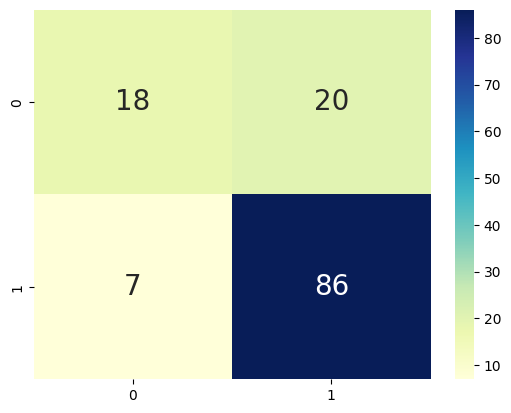

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
POO2 = datos3[(datos3['CÓDIGO'] == 43390843) & (datos3['PERIODO'] == '2023-02')].copy()

POO2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    20
NOTA DEFINITIVA PREREQUISITO 2    12
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 8
PROMEDIO PARCIAL                   0
DEFINITIVA                        13
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO2 = POO2.dropna()
POO2.shape

(105, 16)

In [ ]:
X = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]
y = POO2['CALIFICACIÓN']

X_nuevos = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPOO2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPOO2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        98
1  No Aprobado         7


##MODELO APLICADO A:ARQUITECTURA DECOMPUTADORES

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS' ]

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
APC= datos3 [(datos3 ['CÓDIGO'] == 43390846) & (datos3 ['PERIODO'] != '2023-02')]
APC.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
368,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,3.05,1233501641,2.0,2.25,2.75,0,N,3.54,2.71,2
369,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,4.10,1007381016,3.0,3.75,3.65,1,N,4.50,4.00,1
370,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,4.41,1010248096,4.5,4.50,4.50,1,N,4.28,4.30,1
371,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,3.50,1007103882,4.5,3.75,3.65,1,N,4.29,3.87,1
372,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,3.55,1026305656,3.0,3.00,1.80,0,N,3.43,3.35,2


In [ ]:
APC.shape

(390, 15)

In [ ]:
APC.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    43
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 4
PROMEDIO PARCIAL                   0
DEFINITIVA                         8
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 6
PROMEDIO ACUMULADO                 6
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
APC= APC.dropna()

In [ ]:
APC.shape

(336, 15)

In [ ]:
X = APC[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = APC['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(336, 3) (336,)
(268, 3) (268,)
(68, 3) (68,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9411764705882353
Precision score:  0.9545454545454546
Recall score:  0.984375
F1 score:  0.9692307692307692


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 1  3]
 [ 1 63]]

Classification Report

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.95      0.98      0.97        64

    accuracy                           0.94        68
   macro avg       0.73      0.62      0.65        68
weighted avg       0.93      0.94      0.93        68



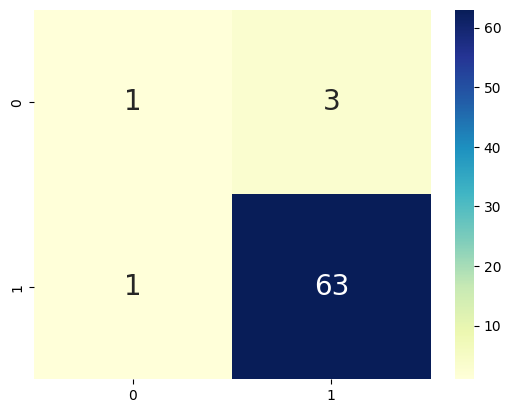

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
APC2 = datos3[(datos3['CÓDIGO'] == 43390846) & (datos3['PERIODO'] == '2023-02')].copy()

APC2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    3
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                3
PROMEDIO PARCIAL                  0
DEFINITIVA                        6
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
APC2 = APC2.dropna()
APC2.shape

(87, 15)

In [ ]:
X = APC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = APC2['CALIFICACIÓN']

X_nuevos = APC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoAPC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoAPC2)

Predicciones para nuevos datos:
 [1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        81
1  No Aprobado         6


##Predicción ARQUITECTURA DECOMPUTADORES

In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_poo = tabla_conteoPOO2.loc[tabla_conteoPOO2['Resultado'] == 'Aprobado', 'Cantidad'].sum()


# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_apc2 = tabla_conteoAPC2.loc[tabla_conteoAPC2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': [aprobados_poo +  no_aprobados_apc2]}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1         104


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V4.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,check,def,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,4.457500e+04,44575.000000,1.067800e+04,9023.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.198841e+17,3.336093,4.278278e+07,3.023197,4.354547e+07,3.724113,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.524842e+17,1.201893,2.140600e+06,0.619380,9.905693e+05,0.796845,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,4.000201e+14,0.000000,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+17,3.050000,4.005017e+07,3.000000,4.339084e+07,3.300000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+17,3.600000,4.339080e+07,3.000000,4.339085e+07,3.810000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+17,4.100000,4.339086e+07,3.000000,4.339086e+07,4.270000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,4.536002e+18,5.000000,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 44)

In [ ]:
datos.columns

Index(['check', 'def', 'PLAN 4064', 'PERIODO', 'CARRERA',
       'DEPARTAMENTO_DEDICACION', 'CÓDIGO', 'ASIGNATURA', 'CRÉDITOS TEÓRICOS',
       'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'PREREQUISITO2_COD',
       'PREREQUISITO2_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO',
       'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE',
       'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
       'DOCUMENTO ESTUDIANTE', 'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE',
       'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 23


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['check', 'def', 'PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO',
       'ASIGNATURA', 'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE',
       'PROMEDIO PARCIAL', 'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 16)

##MODELO APLICADO A: MATEMÁTICAS DISCRETAS

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 44)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','ASIGNATURA',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
MD= datos3 [(datos3 ['CÓDIGO'] == 43390845) & (datos3 ['PERIODO'] != '2023-02')]
MD.tail(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
41837,433908451025322074,4.11,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,3.18,1025322074,4.2,4.05,1,N,3.88,3.59,1
41838,433908451031656226,4.24,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,4.32,1031656226,4.0,4.00,1,N,4.12,4.20,1
41839,433908451000048970,0.00,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,3.85,1000048970,1.7,2.10,0,N,3.45,3.70,2
41840,433908451052358008,3.94,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,4.44,1052358008,3.5,3.70,1,N,3.83,3.89,1
41841,433908451000162362,3.59,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,3.60,1000162362,3.3,3.45,1,N,3.40,3.34,1


In [ ]:
MD.shape

(558, 15)

In [ ]:
MD.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
NOTA DEFINITIVA PREREQUISITO 1    59
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                16
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
MD= MD.dropna()

In [ ]:
MD.shape

(479, 15)

In [ ]:
X = MD[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]#NO ME APARECIO EL PRERREQUISITO 1 CORREGIR URG
y = MD['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(479, 3) (479,)
(383, 3) (383,)
(96, 3) (96,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9479166666666666
Precision score:  0.967391304347826
Recall score:  0.978021978021978
F1 score:  0.9726775956284153


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 2  3]
 [ 2 89]]

Classification Report

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.97      0.98      0.97        91

    accuracy                           0.95        96
   macro avg       0.73      0.69      0.71        96
weighted avg       0.94      0.95      0.95        96



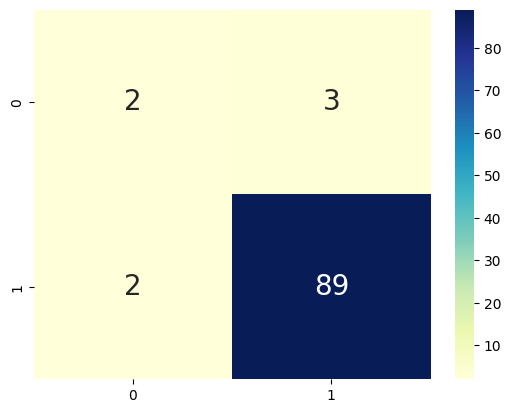

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
MD2 = datos3[(datos3['CÓDIGO'] == 43390845) & (datos3['PERIODO'] == '2023-02')].copy()

MD2.isnull().sum()

check                             0
def                               0
PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
NOTA DEFINITIVA PREREQUISITO 1    8
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                1
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
MD2 = MD2.dropna()
MD2.shape

(94, 15)

In [ ]:
X = MD2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = MD2['CALIFICACIÓN']

X_nuevos = MD2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoMD2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoMD2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        90
1  No Aprobado         4


##MODELO APLICADO A: ESTRUCTURA DE DATOS

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTA DEFINITIVA PREREQUISITO 2',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
ED = datos1 [(datos1 ['CÓDIGO'] == 43390844) & (datos1 ['PERIODO'] != '2023-02')]
ED.head()

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
335,433908441233501641,3.10,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.05,1233501641,2.0,2.50,1,N,3.54,2.71,1
336,433908441003811744,4.15,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.15,1003811744,4.0,4.25,1,N,4.00,3.52,1
337,433908441101696849,3.75,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.35,1101696849,2.5,3.25,1,N,4.33,3.90,1
338,433908441233503069,0.90,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.45,1233503069,2.0,1.50,0,N,1.15,2.61,1
339,433908441032504519,3.40,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.00,1032504519,2.5,3.00,1,N,4.40,3.87,1


In [ ]:
ED.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    46
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                13
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                11
PROMEDIO ACUMULADO                11
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ED1= ED.dropna()

In [ ]:
ED1.isnull().sum()

check                             0
def                               0
PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ED.shape

(524, 16)

In [ ]:
X = ED1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ED1['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(459, 3) (459,)
(367, 3) (367,)
(92, 3) (92,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9456521739130435
Precision score:  0.9764705882352941
Recall score:  0.9651162790697675
F1 score:  0.9707602339181286


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 4  2]
 [ 3 83]]

Classification Report

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.98      0.97      0.97        86

    accuracy                           0.95        92
   macro avg       0.77      0.82      0.79        92
weighted avg       0.95      0.95      0.95        92



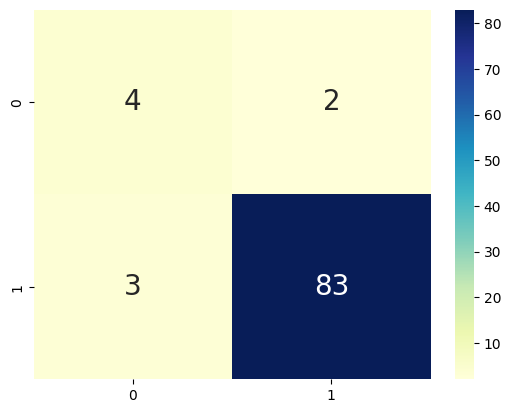

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
ED2 = datos1[(datos1['CÓDIGO'] == 43390844) & (datos1['PERIODO'] == '2023-02')].copy()
ED2.isnull().sum()
ED2 = ED2.dropna()
ED2.shape

(123, 16)

In [ ]:
X = ED2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ED2['CALIFICACIÓN']

In [ ]:
X_nuevos = ED2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoED2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoED2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0]
     Resultado  Cantidad
0     Aprobado       104
1  No Aprobado        19


#MODELO APLICADO A: BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

datos2 = datos2[datos2['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos2['TOTAL_MATRICULADOS'] = datos2.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2= datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
BD = datos2 [(datos2 ['CÓDIGO'] == 43390847) & (datos2 ['PERIODO'] != '2023-02')]
BD.head()

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
376,433908471022440480,3.65,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,NaN,4.15,1022440480,3.5,3.75,1,N,NaN,NaN,1
377,433908471001317329,3.80,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,NaN,3.10,1001317329,4.0,4.00,1,N,4.62,3.88,1
378,433908471022442753,4.15,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,NaN,3.15,1022442753,4.0,4.25,1,N,3.40,3.91,1
379,433908471001342688,3.80,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,NaN,4.30,1001342688,4.0,4.00,1,N,4.61,3.86,1
380,433908471233502105,3.80,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,NaN,3.75,1233502105,4.0,4.00,1,N,NaN,NaN,1


In [ ]:
BD.shape

(388, 17)

In [ ]:
BD.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    54
NOTA DEFINITIVA PREREQUISITO 2    10
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 5
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                18
PROMEDIO ACUMULADO                18
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
BD= BD.dropna()

In [ ]:
BD.shape

(317, 17)

In [ ]:
X = BD[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = BD['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(317, 4) (317,)
(253, 4) (253,)
(64, 4) (64,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9375
Precision score:  0.967741935483871
Recall score:  0.967741935483871
F1 score:  0.967741935483871


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 0  2]
 [ 2 60]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.97      0.97        62

    accuracy                           0.94        64
   macro avg       0.48      0.48      0.48        64
weighted avg       0.94      0.94      0.94        64



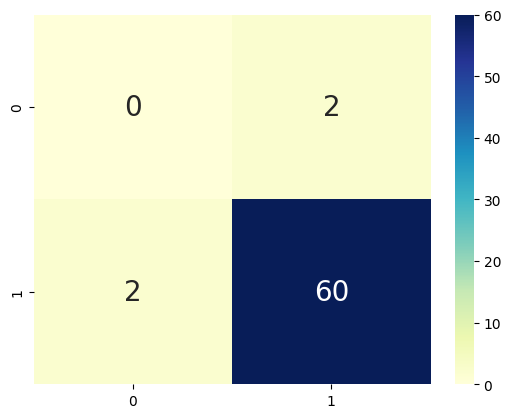

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
BD2 = datos2[(datos2['CÓDIGO'] == 43390847) & (datos2['PERIODO'] == '2023-02')].copy()
BD2.isnull().sum()
BD2 = BD2.dropna()
BD2.shape

(75, 17)

In [ ]:
X = BD2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = BD2['CALIFICACIÓN']

In [ ]:
X_nuevos = BD2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoBD2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoBD2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1]
     Resultado  Cantidad
0     Aprobado        71
1  No Aprobado         4


In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_md = tabla_conteoMD2.loc[tabla_conteoMD2['Resultado'] == 'Aprobado', 'Cantidad'].sum()
aprobados_ed = tabla_conteoED2.loc[tabla_conteoED2['Resultado'] == 'Aprobado', 'Cantidad'].sum()

# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_bd = tabla_conteoBD2.loc[tabla_conteoBD2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': aprobados_md + aprobados_ed +  no_aprobados_bd}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1         198


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: ARQUITECTURA DE SISTEMAS II

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
DA= datos3 [(datos3 ['CÓDIGO'] == 43390860) & (datos3 ['PERIODO'] != '2023-02')]
DA.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
6897,SI,2023-01,INGENIERÍA DE SISTEMAS,43390860,DATA ANALYTICS,NaN,1000596003,4.3,3.85,1,N,4.10,3.86,1
6898,SI,2023-01,INGENIERÍA DE SISTEMAS,43390860,DATA ANALYTICS,3.77,1000781364,4.7,4.80,1,N,4.60,4.31,1
6899,SI,2023-01,INGENIERÍA DE SISTEMAS,43390860,DATA ANALYTICS,4.01,1192801435,4.5,4.20,1,N,4.67,4.33,1
6900,SI,2023-01,INGENIERÍA DE SISTEMAS,43390860,DATA ANALYTICS,3.55,1015472505,2.3,3.25,1,N,4.00,3.34,1
6901,SI,2023-01,INGENIERÍA DE SISTEMAS,43390860,DATA ANALYTICS,3.79,1010099314,4.1,3.70,1,N,3.99,3.85,1


In [ ]:
DA.shape

(105, 14)

In [ ]:
DA.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    27
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                13
PROMEDIO ACUMULADO                13
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
DA= DA.dropna()

In [ ]:
DA.shape

(69, 14)

In [ ]:
X = DA[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = DA['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(69, 3) (69,)
(55, 3) (55,)
(14, 3) (14,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[14]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



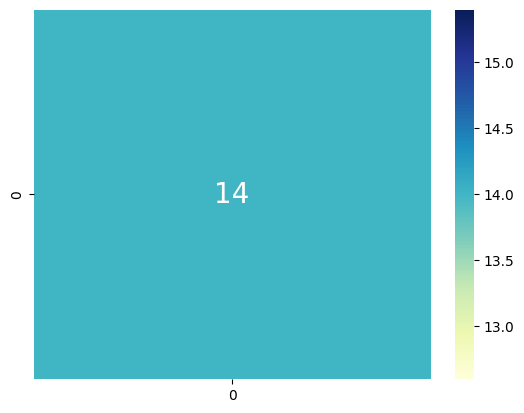

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
DA2 = datos3[(datos3['CÓDIGO'] == 43390859) & (datos3['PERIODO'] == '2023-02')].copy()

DA2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    2
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
DA2 = DA2.dropna()
DA2.shape

(46, 14)

In [ ]:
X = DA2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = DA2['CALIFICACIÓN']

X_nuevos = DA2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones y asignar un índice numérico
resultados = pd.DataFrame({'Predicción': y_pred_nuevos}, index=X_nuevos.index)

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoDA2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoDA2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        46
1  No Aprobado         0


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V4.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,check,def,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,4.457500e+04,44575.000000,1.067800e+04,9023.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.198841e+17,3.336093,4.278278e+07,3.023197,4.354547e+07,3.724113,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.524842e+17,1.201893,2.140600e+06,0.619380,9.905693e+05,0.796845,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,4.000201e+14,0.000000,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+17,3.050000,4.005017e+07,3.000000,4.339084e+07,3.300000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+17,3.600000,4.339080e+07,3.000000,4.339085e+07,3.810000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+17,4.100000,4.339086e+07,3.000000,4.339086e+07,4.270000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,4.536002e+18,5.000000,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 44)

In [ ]:
datos.columns

Index(['check', 'def', 'PLAN 4064', 'PERIODO', 'CARRERA',
       'DEPARTAMENTO_DEDICACION', 'CÓDIGO', 'ASIGNATURA', 'CRÉDITOS TEÓRICOS',
       'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'PREREQUISITO2_COD',
       'PREREQUISITO2_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO',
       'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE',
       'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
       'DOCUMENTO ESTUDIANTE', 'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE',
       'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 23


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['check', 'def', 'PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO',
       'ASIGNATURA', 'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE',
       'PROMEDIO PARCIAL', 'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 16)

##MODELO APLICADO A: ESTILOS Y LENGUAJES DE PROGRAMACIÓN

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 44)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
ELP= datos3 [(datos3 ['CÓDIGO'] == 43390849) & (datos3 ['PERIODO'] != '2023-02')]
ELP.tail(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
6497,433908491000859623,4.19,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.91,1000859623,4.3,4.25,1,N,3.63,3.93,1
6498,433908491000791225,3.92,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.51,1000791225,4.4,4.20,1,N,3.58,3.89,1
6499,433908491001296447,4.03,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,2.13,1001296447,4.7,4.25,1,N,3.94,3.72,1
6500,433908491000219898,4.03,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.71,1000219898,4.5,4.25,1,N,3.58,3.53,1
6501,433908491000120019,4.40,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.03,1000120019,4.7,4.60,1,N,4.11,3.93,1


In [ ]:
ELP.shape

(294, 16)

In [ ]:
ELP.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     5
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 3
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ELP= ELP.dropna()

In [ ]:
ELP.shape

(274, 16)

In [ ]:
X = ELP[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ELP['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(274, 3) (274,)
(219, 3) (219,)
(55, 3) (55,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9272727272727272
Precision score:  0.9272727272727272
Recall score:  1.0
F1 score:  0.9622641509433962


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 0  4]
 [ 0 51]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      1.00      0.96        51

    accuracy                           0.93        55
   macro avg       0.46      0.50      0.48        55
weighted avg       0.86      0.93      0.89        55



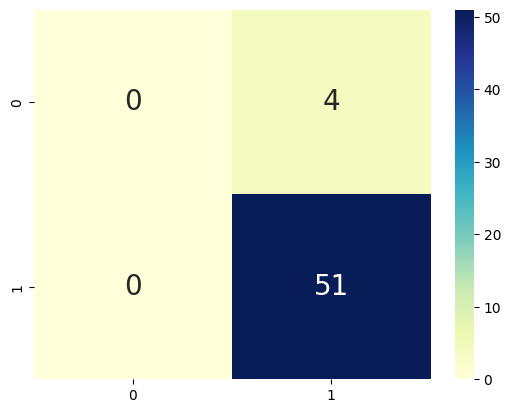

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
ELP2 = datos3[(datos3['CÓDIGO'] == 43390849) & (datos3['PERIODO'] == '2023-02')].copy()

ELP2.isnull().sum()

check                             0
def                               0
PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                1
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ELP2 = ELP2.dropna()
ELP2.shape

(74, 16)

In [ ]:
X = ELP2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ELP2['CALIFICACIÓN']

X_nuevos = ELP2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoELP2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoELP2)

Predicciones para nuevos datos:
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        72
1  No Aprobado         2


##MODELO APLICADO A: INTRODUCCIÓN A LA TEORIA DE LA COMPUTACIÓN

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTA DEFINITIVA PREREQUISITO 2',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
ITPC = datos1 [(datos1 ['CÓDIGO'] == 43390848) & (datos1 ['PERIODO'] != '2023-02')]
ITPC.head()

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
635,433908481003811744,3.27,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.20,1003811744,3.3,2.85,1,N,4.00,3.52,1
636,433908481007228578,3.50,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.65,1007228578,3.4,3.10,1,N,NaN,NaN,1
637,433908481020842794,2.44,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.50,1020842794,2.6,2.20,0,N,3.61,3.57,3
638,433908481001083571,3.26,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.35,1001083571,3.5,3.10,1,N,NaN,NaN,1
639,433908481193548613,3.39,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.10,1193548613,3.2,3.05,1,N,4.09,3.87,1


In [ ]:
ITPC.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    17
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                17
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                18
PROMEDIO ACUMULADO                18
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ITPC= ITPC.dropna()

In [ ]:
ITPC.isnull().sum()

check                             0
def                               0
PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ITPC.shape

(476, 16)

In [ ]:
X = ITPC[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ITPC['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(476, 3) (476,)
(380, 3) (380,)
(96, 3) (96,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.8333333333333334
Precision score:  0.8904109589041096
Recall score:  0.8904109589041096
F1 score:  0.8904109589041096


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[15  8]
 [ 8 65]]

Classification Report

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.89      0.89      0.89        73

    accuracy                           0.83        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.83      0.83      0.83        96



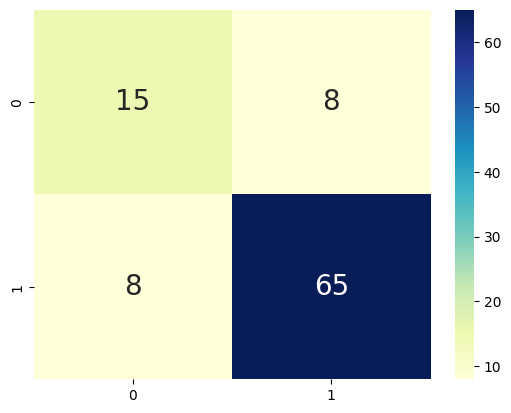

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
ITPC2 = datos1[(datos1['CÓDIGO'] == 43390848) & (datos1['PERIODO'] == '2023-02')].copy()
ITPC2.isnull().sum()
ITPC2 = ITPC2.dropna()
ITPC2.shape

(97, 16)

In [ ]:
X = ITPC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ITPC2['CALIFICACIÓN']

In [ ]:
X_nuevos = ITPC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoITPC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoITPC2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        90
1  No Aprobado         7


##PREDICCIÓN

In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_elp = tabla_conteoELP2.loc[tabla_conteoELP2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_itpc = tabla_conteoITPC2.loc[tabla_conteoITPC2['Resultado'] == 'Aprobado', 'Cantidad'].sum()

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': aprobados_elp  +  no_aprobados_itpc}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1          92


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V4.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,check,def,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,4.457500e+04,44575.000000,1.067800e+04,9023.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.198841e+17,3.336093,4.278278e+07,3.023197,4.354547e+07,3.724113,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.524842e+17,1.201893,2.140600e+06,0.619380,9.905693e+05,0.796845,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,4.000201e+14,0.000000,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+17,3.050000,4.005017e+07,3.000000,4.339084e+07,3.300000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+17,3.600000,4.339080e+07,3.000000,4.339085e+07,3.810000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+17,4.100000,4.339086e+07,3.000000,4.339086e+07,4.270000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,4.536002e+18,5.000000,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 44)

In [ ]:
datos.columns

Index(['check', 'def', 'PLAN 4064', 'PERIODO', 'CARRERA',
       'DEPARTAMENTO_DEDICACION', 'CÓDIGO', 'ASIGNATURA', 'CRÉDITOS TEÓRICOS',
       'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'PREREQUISITO2_COD',
       'PREREQUISITO2_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO',
       'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE',
       'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
       'DOCUMENTO ESTUDIANTE', 'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE',
       'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 23


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['check', 'def', 'PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO',
       'ASIGNATURA', 'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE',
       'PROMEDIO PARCIAL', 'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 16)

##MODELO APLICADO A: ESTILOS Y LENGUAJES DE PROGRAMACIÓN

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 44)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
ELP= datos3 [(datos3 ['CÓDIGO'] == 43390849) & (datos3 ['PERIODO'] != '2023-02')]
ELP.tail(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
6497,433908491000859623,4.19,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.91,1000859623,4.3,4.25,1,N,3.63,3.93,1
6498,433908491000791225,3.92,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.51,1000791225,4.4,4.20,1,N,3.58,3.89,1
6499,433908491001296447,4.03,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,2.13,1001296447,4.7,4.25,1,N,3.94,3.72,1
6500,433908491000219898,4.03,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.71,1000219898,4.5,4.25,1,N,3.58,3.53,1
6501,433908491000120019,4.40,SI,2023-01,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,3.03,1000120019,4.7,4.60,1,N,4.11,3.93,1


In [ ]:
ELP.shape

(294, 16)

In [ ]:
ELP.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     5
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 3
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ELP= ELP.dropna()

In [ ]:
ELP.shape

(274, 16)

In [ ]:
X = ELP[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ELP['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(274, 3) (274,)
(219, 3) (219,)
(55, 3) (55,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9272727272727272
Precision score:  0.9272727272727272
Recall score:  1.0
F1 score:  0.9622641509433962


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 0  4]
 [ 0 51]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.93      1.00      0.96        51

    accuracy                           0.93        55
   macro avg       0.46      0.50      0.48        55
weighted avg       0.86      0.93      0.89        55



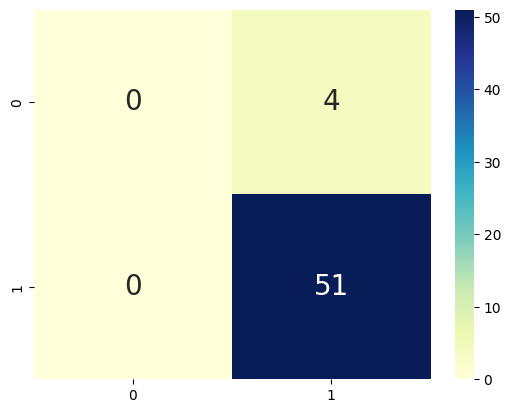

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
ELP2 = datos3[(datos3['CÓDIGO'] == 43390849) & (datos3['PERIODO'] == '2023-02')].copy()

ELP2.isnull().sum()

check                             0
def                               0
PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                1
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ELP2 = ELP2.dropna()
ELP2.shape

(74, 16)

In [ ]:
X = ELP2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ELP2['CALIFICACIÓN']

X_nuevos = ELP2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoELP2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoELP2)

Predicciones para nuevos datos:
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        72
1  No Aprobado         2


##MODELO APLICADO A: INTRODUCCIÓN A LA TEORIA DE LA COMPUTACIÓN

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTA DEFINITIVA PREREQUISITO 2',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,400501681016014851,3.7,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,400501681026289722,3.8,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,400501681022327856,2.1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,400501681010205208,3.0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,400501681022385102,3.6,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
ITPC = datos1 [(datos1 ['CÓDIGO'] == 43390848) & (datos1 ['PERIODO'] != '2023-02')]
ITPC.head()

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
635,433908481003811744,3.27,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.20,1003811744,3.3,2.85,1,N,4.00,3.52,1
636,433908481007228578,3.50,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.65,1007228578,3.4,3.10,1,N,NaN,NaN,1
637,433908481020842794,2.44,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.50,1020842794,2.6,2.20,0,N,3.61,3.57,3
638,433908481001083571,3.26,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.35,1001083571,3.5,3.10,1,N,NaN,NaN,1
639,433908481193548613,3.39,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.10,1193548613,3.2,3.05,1,N,4.09,3.87,1


In [ ]:
ITPC.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    17
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                17
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                18
PROMEDIO ACUMULADO                18
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ITPC= ITPC.dropna()

In [ ]:
ITPC.isnull().sum()

check                             0
def                               0
PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ITPC.shape

(476, 16)

In [ ]:
X = ITPC[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ITPC['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(476, 3) (476,)
(380, 3) (380,)
(96, 3) (96,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.8333333333333334
Precision score:  0.8904109589041096
Recall score:  0.8904109589041096
F1 score:  0.8904109589041096


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[15  8]
 [ 8 65]]

Classification Report

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.89      0.89      0.89        73

    accuracy                           0.83        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.83      0.83      0.83        96



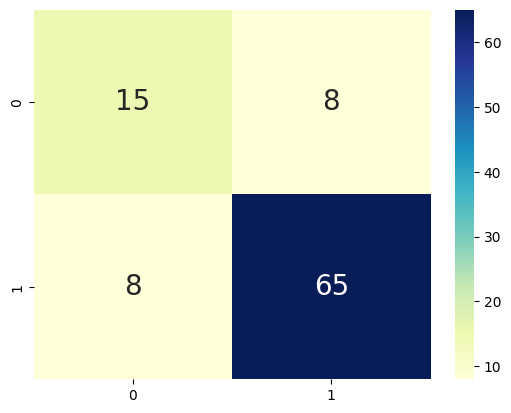

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
ITPC2 = datos1[(datos1['CÓDIGO'] == 43390848) & (datos1['PERIODO'] == '2023-02')].copy()
ITPC2.isnull().sum()
ITPC2 = ITPC2.dropna()
ITPC2.shape

(97, 16)

In [ ]:
X = ITPC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ITPC2['CALIFICACIÓN']

In [ ]:
X_nuevos = ITPC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoITPC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoITPC2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        90
1  No Aprobado         7


##PREDICCIÓN

In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_elp = tabla_conteoELP2.loc[tabla_conteoELP2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_itpc = tabla_conteoITPC2.loc[tabla_conteoITPC2['Resultado'] == 'Aprobado', 'Cantidad'].sum()

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': aprobados_elp  +  no_aprobados_itpc}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1          92


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V3.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,8.824000e+03,8035.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.341811e+07,3.742055,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.633119e+05,0.810231,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.330000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339085e+07,3.850000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.300000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(8824, 16)

## PREDICCIÓN DE ESTRUCTURAS DE DATOS, BASADOS EN EL PRERREQUISITO PROGRAMACIÓN ORIENTADA A OBJETOS.

In [ ]:
POO1 = datos1[(datos1['CÓDIGO'] == 43390843) & (datos1['PERIODO'] != '2023-02')]
POO1.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,NaN,NaN,1013692387,2.5,2.50,2.50,0,N,4.93,3.88,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.40,3.1,1193548613,4.5,4.00,3.60,1,N,4.09,3.87,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.05,3.9,1001083571,4.0,3.75,3.45,1,N,NaN,NaN,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.00,3.2,1024602262,3.0,2.25,2.35,0,N,1.61,2.69,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,4.25,3.5,1014304950,3.0,3.25,3.15,1,N,4.22,3.68,1


In [ ]:
POO1.shape

(822, 16)

In [ ]:
POO1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    78
NOTA DEFINITIVA PREREQUISITO 2    69
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                41
PROMEDIO PARCIAL                   0
DEFINITIVA                        82
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO1 = POO1.dropna()

In [ ]:
POO1.shape

(654, 16)

In [ ]:
POO1.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
NOTA DEFINITIVA PREREQUISITO 2    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
DEFINITIVA                        0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
X = POO1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = POO1['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(654, 4) (654,)
(523, 4) (523,)
(131, 4) (131,)


### Modelo Naive-bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.7938931297709924
Precision score:  0.8113207547169812
Recall score:  0.9247311827956989
F1 score:  0.8643216080402009


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[18 20]
 [ 7 86]]

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.81      0.92      0.86        93

    accuracy                           0.79       131
   macro avg       0.77      0.70      0.72       131
weighted avg       0.78      0.79      0.78       131



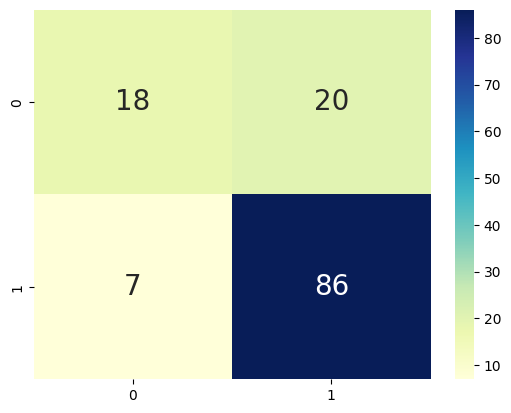

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##NUEVOS DATOS

In [ ]:
P002 = datos1[(datos1['CÓDIGO'] == 43390843) & (datos1['PERIODO'] == '2023-02')]

P002 = P002.dropna()

X_nuevos = P002[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoP002 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoP002)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        98
1  No Aprobado         7


________________________________________


#MODELO APLICADO A: ESTRUCTURAS DE DATOS

In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

datos2 = datos2[datos2['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos2['TOTAL_MATRICULADOS'] = datos2.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTA DEFINITIVA PREREQUISITO 2',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2= datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.head(5)

NameError: name 'datos' is not defined

In [ ]:
ED = datos2 [(datos2 ['CÓDIGO'] == 43390844) & (datos2 ['PERIODO'] != '2023-02')]
ED.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
335,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.05,1233501641,2.0,2.50,1,N,3.54,2.71,1
336,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.15,1003811744,4.0,4.25,1,N,4.00,3.52,1
337,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.35,1101696849,2.5,3.25,1,N,4.33,3.90,1
338,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.45,1233503069,2.0,1.50,0,N,1.15,2.61,1
339,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,3.00,1032504519,2.5,3.00,1,N,4.40,3.87,1


In [ ]:
ED.shape

(524, 14)

In [ ]:
ED.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    46
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                13
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                11
PROMEDIO ACUMULADO                11
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ED1= ED.dropna()

In [ ]:
ED1.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ED1.shape

(524, 14)

**Nota**: Para esta asignatura existe el caso en el que solo tiene 1 prerrequisito, procedemos a borrar la columna de prerrequisito 2 para que no genere nulos.

In [ ]:
X = ED1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ED1['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(459, 3) (459,)
(367, 3) (367,)
(92, 3) (92,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9456521739130435
Precision score:  0.9764705882352941
Recall score:  0.9651162790697675
F1 score:  0.9707602339181286


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 4  2]
 [ 3 83]]

Classification Report

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.98      0.97      0.97        86

    accuracy                           0.95        92
   macro avg       0.77      0.82      0.79        92
weighted avg       0.95      0.95      0.95        92



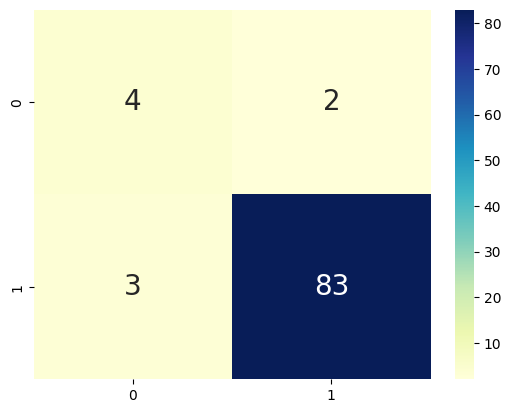

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
ED2 = datos2[(datos2['CÓDIGO'] == 43390844) & (datos2['PERIODO'] == '2023-02')].copy()

In [ ]:
ED2.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'DOCUMENTO ESTUDIANTE',
       'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL', 'CALIFICACIÓN',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO',
       'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
ED2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    5
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                2
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ED2 = ED2.dropna()

In [ ]:
ED2.shape

(123, 14)

In [ ]:
X = ED2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ED2['CALIFICACIÓN']

In [ ]:
X_nuevos = ED2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoED2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoED2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0]
     Resultado  Cantidad
0     Aprobado       104
1  No Aprobado        19


##Predicción Estructura de Datos

In [ ]:
# Sumar los Aprobados de tabla_conteoP002 y los No Aprobados de tabla_conteoED2
aprobados_p002 = tabla_conteoP002.loc[tabla_conteoP002['Resultado'] == 'Aprobado', 'Cantidad'].values[0]
no_aprobados_ed2 = tabla_conteoED2.loc[tabla_conteoED2['Resultado'] == 'No Aprobado', 'Cantidad'].values[0]

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': [aprobados_p002 + no_aprobados_ed2]}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1         117


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: GESTIÓN TECNOLOGÍAS DE LA INFORMACIÓN

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
CB= datos3 [(datos3 ['CÓDIGO'] == 43390864) & (datos3 ['PERIODO'] != '2023-02')]
CB.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
7040,SI,2023-01,INGENIERÍA DE SISTEMAS,43390864,GESTIÓN DE TECNOLOGÍAS DE LA INFORMACIÓN,4.60,1000349634,2.2,2.80,0,N,3.86,3.94,2
7041,SI,2023-01,INGENIERÍA DE SISTEMAS,43390864,GESTIÓN DE TECNOLOGÍAS DE LA INFORMACIÓN,4.28,1010036394,4.2,4.25,1,N,4.08,4.14,1
7042,SI,2023-01,INGENIERÍA DE SISTEMAS,43390864,GESTIÓN DE TECNOLOGÍAS DE LA INFORMACIÓN,4.50,1001204183,4.3,4.25,1,N,4.41,4.22,1
7043,SI,2023-01,INGENIERÍA DE SISTEMAS,43390864,GESTIÓN DE TECNOLOGÍAS DE LA INFORMACIÓN,3.41,1010203985,4.0,4.05,1,N,3.49,2.80,1
7044,SI,2023-01,INGENIERÍA DE SISTEMAS,43390864,GESTIÓN DE TECNOLOGÍAS DE LA INFORMACIÓN,4.55,1001202777,4.3,4.40,1,N,4.54,4.29,1


In [ ]:
CB.shape

(74, 14)

In [ ]:
CB.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    10
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
CB= CB.dropna()

In [ ]:
CB.shape

(56, 14)

In [ ]:
X = CB[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = CB['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(56, 3) (56,)
(44, 3) (44,)
(12, 3) (12,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[12]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



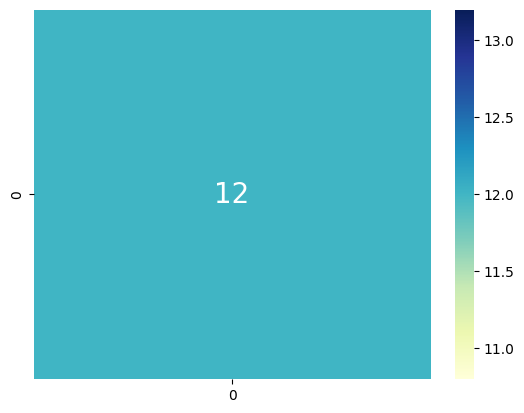

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
CB2 = datos3[(datos3['CÓDIGO'] == 43390864) & (datos3['PERIODO'] == '2023-02')].copy()

CB2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    12
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
CB2 = CB2.dropna()
CB2.shape

(39, 14)

In [ ]:
X = CB2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = CB2['CALIFICACIÓN']

X_nuevos = CB2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones y asignar un índice numérico
resultados = pd.DataFrame({'Predicción': y_pred_nuevos}, index=X_nuevos.index)

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoCB2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoCB2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
     Resultado  Cantidad
0     Aprobado        39
1  No Aprobado         0


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V4.xlsx") #Lau
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,1.317800e+04,11349.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.359627e+07,3.649435,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.573066e+05,0.819277,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.210000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339084e+07,3.720000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.200000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 14)

##MODELO APLICADO A: MATEMÁTICAS DISCRETAS

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','ASIGNATURA',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
MD= datos3 [(datos3 ['CÓDIGO'] == 43390845) & (datos3 ['PERIODO'] != '2023-02')]
MD.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
41837,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,3.18,1025322074,4.2,4.05,1,N,3.88,3.59,1
41838,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,4.32,1031656226,4.0,4.00,1,N,4.12,4.20,1
41839,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,3.85,1000048970,1.7,2.10,0,N,3.45,3.70,2
41840,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,4.44,1052358008,3.5,3.70,1,N,3.83,3.89,1
41841,NO,2023-01,INGENIERÍA DE SISTEMAS,43390845,3.60,1000162362,3.3,3.45,1,N,3.40,3.34,1


In [ ]:
MD.shape

(558, 13)

In [ ]:
MD.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
NOTA DEFINITIVA PREREQUISITO 1    59
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                16
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
MD= MD.dropna()

In [ ]:
MD.shape

(479, 13)

In [ ]:
X = MD[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE']]#NO ME APARECIO EL PRERREQUISITO 1 CORREGIR URG
y = MD['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(479, 2) (479,)
(383, 2) (383,)
(96, 2) (96,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.96875
Precision score:  0.9782608695652174
Recall score:  0.989010989010989
F1 score:  0.9836065573770493


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 3  2]
 [ 1 90]]

Classification Report

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.98      0.99      0.98        91

    accuracy                           0.97        96
   macro avg       0.86      0.79      0.83        96
weighted avg       0.97      0.97      0.97        96



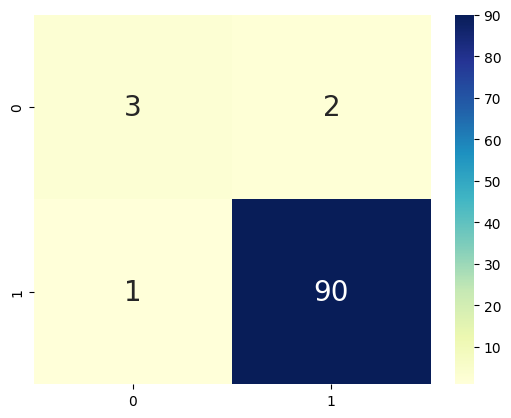

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
MD2 = datos3[(datos3['CÓDIGO'] == 43390845) & (datos3['PERIODO'] == '2023-02')].copy()

MD2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
NOTA DEFINITIVA PREREQUISITO 1    8
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                1
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
MD2 = MD2.dropna()
MD2.shape

(94, 13)

In [ ]:
X = MD2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = MD2['CALIFICACIÓN']

X_nuevos = MD2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoMD2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoMD2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        90
1  No Aprobado         4


##MODELO APLICADO A: INTRODUCCIÓN A LA TEORIA DE LA COMPUTACIÓN

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTA DEFINITIVA PREREQUISITO 2',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
ITPC = datos1 [(datos1 ['CÓDIGO'] == 43390848) & (datos1 ['PERIODO'] != '2023-02')]
ITPC.shape

,check,def,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
635,433908481003811744,3.27,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.20,1003811744,3.3,2.85,1,N,4.00,3.52,1
636,433908481007228578,3.50,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.65,1007228578,3.4,3.10,1,N,NaN,NaN,1
637,433908481020842794,2.44,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.50,1020842794,2.6,2.20,0,N,3.61,3.57,3
638,433908481001083571,3.26,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.35,1001083571,3.5,3.10,1,N,NaN,NaN,1
639,433908481193548613,3.39,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,3.10,1193548613,3.2,3.05,1,N,4.09,3.87,1


In [ ]:
ITPC.isnull().sum()

check                              0
def                                0
PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    17
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                17
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                18
PROMEDIO ACUMULADO                18
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
ITPC= ITPC.dropna()

In [ ]:
ITPC.isnull().sum()

check                             0
def                               0
PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
ITPC.shape

(476, 16)

In [ ]:
X = ITPC[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ITPC['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(476, 3) (476,)
(380, 3) (380,)
(96, 3) (96,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.8333333333333334
Precision score:  0.8904109589041096
Recall score:  0.8904109589041096
F1 score:  0.8904109589041096


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[15  8]
 [ 8 65]]

Classification Report

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        23
           1       0.89      0.89      0.89        73

    accuracy                           0.83        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.83      0.83      0.83        96



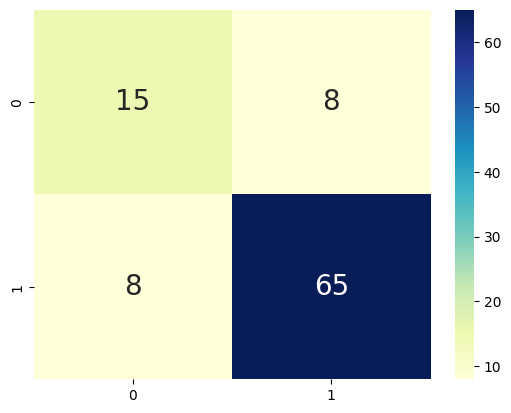

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
ITPC2 = datos1[(datos1['CÓDIGO'] == 43390848) & (datos1['PERIODO'] == '2023-02')].copy()
ITPC2.isnull().sum()
ITPC2 = ITPC2.dropna()
ITPC2.shape

(97, 16)

In [ ]:
X = ITPC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ITPC2['CALIFICACIÓN']

In [ ]:
X_nuevos = ITPC2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoITPC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoITPC2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        90
1  No Aprobado         7


##PREDICCIÓN

In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_md = tabla_conteoMD2.loc[tabla_conteoMD2['Resultado'] == 'Aprobado', 'Cantidad'].sum()

# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_itpc = tabla_conteoITPC2.loc[tabla_conteoITPC2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': aprobados_md  +  no_aprobados_itpc}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1          97


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: MATEMATICAS ESPECIALES

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
MES= datos3 [(datos3 ['CÓDIGO'] == 45190010) & (datos3 ['PERIODO'] != '2023-02')]
MES.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
42040,NO,2023-01,INGENIERÍA DE SISTEMAS,45190010,MATEMÁTICAS ESPECIALES,3.31,1010133365,3.0,3.25,1,N,3.77,3.65,1
42041,NO,2023-01,INGENIERÍA DE SISTEMAS,45190010,MATEMÁTICAS ESPECIALES,NaN,1001346119,2.5,2.25,0,N,2.96,3.49,1
42042,NO,2023-01,INGENIERÍA DE SISTEMAS,45190010,MATEMÁTICAS ESPECIALES,3.03,1020825976,2.7,2.95,1,N,3.57,3.03,1
42043,NO,2023-01,INGENIERÍA DE SISTEMAS,45190010,MATEMÁTICAS ESPECIALES,3.03,1000269194,3.2,3.20,1,N,3.58,3.73,1
42044,NO,2023-01,INGENIERÍA DE SISTEMAS,45190010,MATEMÁTICAS ESPECIALES,4.04,1000856855,3.3,3.70,1,N,4.07,4.07,1


In [ ]:
MES.shape

(314, 14)

In [ ]:
MES.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    10
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                10
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                13
PROMEDIO ACUMULADO                13
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
MES= MES.dropna()

In [ ]:
MES.shape

(282, 14)

In [ ]:
X = MES[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = MES['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(282, 3) (282,)
(225, 3) (225,)
(57, 3) (57,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9122807017543859
Precision score:  0.9622641509433962
Recall score:  0.9444444444444444
F1 score:  0.9532710280373832


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 1  2]
 [ 3 51]]

Classification Report

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       0.96      0.94      0.95        54

    accuracy                           0.91        57
   macro avg       0.61      0.64      0.62        57
weighted avg       0.92      0.91      0.92        57



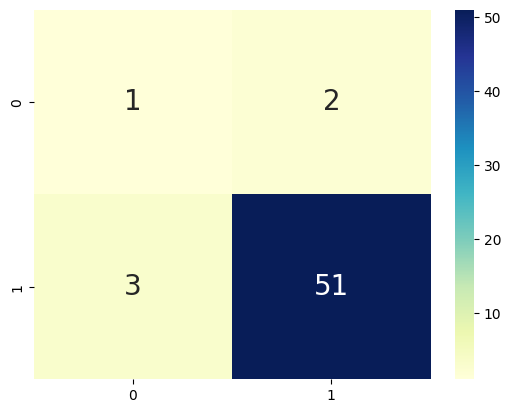

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
MES2 = datos3[(datos3['CÓDIGO'] == 45190010) & (datos3['PERIODO'] == '2023-02')].copy()

MES2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    4
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
MES2 = MES2.dropna()
MES2.shape

(58, 14)

In [ ]:
X = MES2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = MES2['CALIFICACIÓN']

X_nuevos = MES2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoMES2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoMES2)

Predicciones para nuevos datos:
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        55
1  No Aprobado         3


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: ARQUITECTURA DE SISTEMAS II

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2','NOTAS PRIMER CORTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,1,N,4.08,3.77,1


In [ ]:
PII4= datos3 [(datos3 ['CÓDIGO'] == 43390861) & (datos3 ['PERIODO'] != '2023-02')]
PII4.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
6939,SI,2023-01,INGENIERÍA DE SISTEMAS,43390861,PRÁCTICA DE INGENIERÍA DE SISTEMAS IV,3.9,1000213670,0.0,1,N,4.51,3.90,1
6940,SI,2023-01,INGENIERÍA DE SISTEMAS,43390861,PRÁCTICA DE INGENIERÍA DE SISTEMAS IV,4.9,1000349634,0.0,1,N,3.86,3.94,1
6941,SI,2023-01,INGENIERÍA DE SISTEMAS,43390861,PRÁCTICA DE INGENIERÍA DE SISTEMAS IV,4.2,1022433178,0.0,1,N,4.43,3.57,1
6942,SI,2023-01,INGENIERÍA DE SISTEMAS,43390861,PRÁCTICA DE INGENIERÍA DE SISTEMAS IV,4.6,1007645763,0.0,1,N,4.54,4.14,1
6943,SI,2023-01,INGENIERÍA DE SISTEMAS,43390861,PRÁCTICA DE INGENIERÍA DE SISTEMAS IV,5.0,1000506838,0.0,1,N,4.94,3.81,1


In [ ]:
PII4.shape

(146, 13)

In [ ]:
PII4.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     2
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                13
PROMEDIO ACUMULADO                13
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
PII4= PII4.dropna()

In [ ]:
PII4.shape

(131, 13)

In [ ]:
X = PII4[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1']]
y = PII4['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(131, 2) (131,)
(104, 2) (104,)
(27, 2) (27,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9629629629629629
Precision score:  1.0
Recall score:  0.96
F1 score:  0.9795918367346939


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 2  0]
 [ 1 24]]

Classification Report

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.96      0.98        25

    accuracy                           0.96        27
   macro avg       0.83      0.98      0.89        27
weighted avg       0.98      0.96      0.97        27



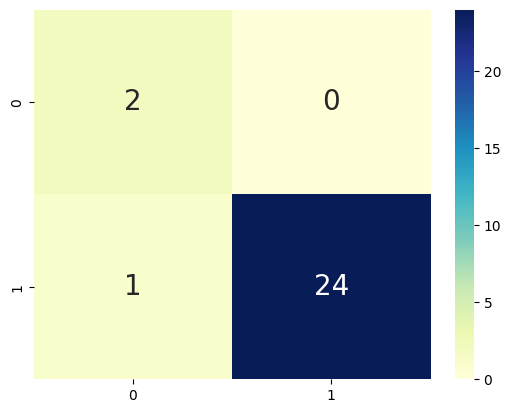

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
PII42 = datos3[(datos3['CÓDIGO'] == 43390859) & (datos3['PERIODO'] == '2023-02')].copy()

PII42.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    2
DOCUMENTO ESTUDIANTE              0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
PII42 = PII42.dropna()
PII42.shape

(46, 13)

In [ ]:
X = PII42[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1']]
y = PII42['CALIFICACIÓN']

X_nuevos = PII42[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones y asignar un índice numérico
resultados = pd.DataFrame({'Predicción': y_pred_nuevos}, index=X_nuevos.index)

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPII42 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPII42)

Predicciones para nuevos datos:
 [1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 0 1]
     Resultado  Cantidad
0     Aprobado        39
1  No Aprobado         7


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: GESTIÓN TECNOLOGÍAS DE LA INFORMACIÓN

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD','NOTAS PRIMER CORTE',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,1,N,4.08,3.77,1


In [ ]:
PI5= datos3 [(datos3 ['CÓDIGO'] == 43390865) & (datos3 ['PERIODO'] != '2023-02')]
PI5.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
7069,SI,2023-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.3,1000469070,0.0,1,N,4.32,3.84,1
7070,SI,2023-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.4,1001199004,0.0,1,N,4.36,3.88,1
7071,SI,2023-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.3,1136889361,0.0,1,N,4.10,3.75,1
7072,SI,2023-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.2,1001097809,0.0,1,N,3.97,3.79,1
7073,SI,2023-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,NaN,1023925184,0.0,1,N,3.65,3.52,1


In [ ]:
PI5.shape

(83, 13)

In [ ]:
PI5.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     2
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
PI5= PI5.dropna()

In [ ]:
PI5.shape

(69, 13)

In [ ]:
X = PI5[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1']]
y = PI5['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(69, 2) (69,)
(55, 2) (55,)
(14, 2) (14,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[14]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



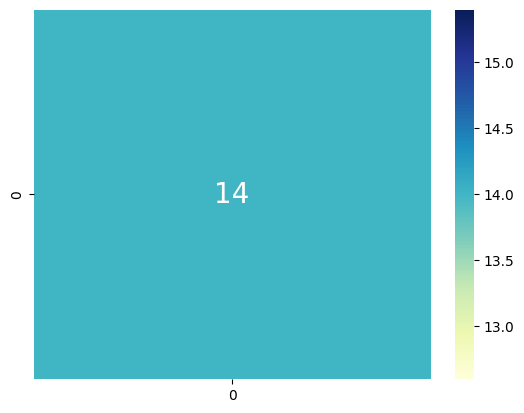

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
PI52 = datos3[(datos3['CÓDIGO'] == 43390865) & (datos3['PERIODO'] == '2023-02')].copy()

PI52.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
DOCUMENTO ESTUDIANTE              0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
PI52 = PI52.dropna()
PI52.shape

(44, 13)

In [ ]:
X = PI52[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1']]
y = PI52['CALIFICACIÓN']

X_nuevos = PI52[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones y asignar un índice numérico
resultados = pd.DataFrame({'Predicción': y_pred_nuevos}, index=X_nuevos.index)

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPI52 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPI52)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        44
1  No Aprobado         0


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,1.317800e+04,11349.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.359627e+07,3.649435,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.573066e+05,0.819277,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.210000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339084e+07,3.720000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.200000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 14)

## PREDICCIÓN DE PRÁCTICA DE INGENIERÍA I, PENSAMIENTO SISTÉMICO PENSAMIENTO ALGORÍTMICO

In [ ]:
PA = datos1[(datos1['CÓDIGO'] == 43390801) & (datos1['PERIODO'] != '2023-02')]
PA.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
20837,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1056805955,3.0,3.00,3.60,1,N,4.27,3.64,1
20838,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1233503069,3.0,2.75,3.05,1,N,1.15,2.61,1
20839,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1013689152,3.5,3.50,3.30,1,N,0.78,1.96,1
20840,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1077479498,3.0,2.75,2.45,0,N,4.35,3.55,2
20841,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1023963033,3.0,2.50,2.70,0,N,2.85,2.77,2


In [ ]:
PA.shape

(1097, 14)

In [ ]:
PA.isnull().sum()

PLAN 4064                0
PERIODO                  0
CARRERA                  0
CÓDIGO                   0
ASIGNATURA               0
DOCUMENTO ESTUDIANTE     0
NOTAS PRIMER CORTE      25
PROMEDIO PARCIAL         0
DEFINITIVA              84
CALIFICACIÓN             0
ASIGNATURA ANULADA       0
PROMEDIO SEMESTRAL      45
PROMEDIO ACUMULADO      45
TOTAL_MATRICULADOS       0
dtype: int64

In [ ]:
PA = PA.dropna()

In [ ]:
PA.shape

(999, 14)

In [ ]:
PA.isnull().sum()

PLAN 4064               0
PERIODO                 0
CARRERA                 0
CÓDIGO                  0
ASIGNATURA              0
DOCUMENTO ESTUDIANTE    0
NOTAS PRIMER CORTE      0
PROMEDIO PARCIAL        0
DEFINITIVA              0
CALIFICACIÓN            0
ASIGNATURA ANULADA      0
PROMEDIO SEMESTRAL      0
PROMEDIO ACUMULADO      0
TOTAL_MATRICULADOS      0
dtype: int64

In [ ]:
X = PA[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE']]
y = PA['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(999, 2) (999,)
(799, 2) (799,)
(200, 2) (200,)


### Modelo Naive-bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.885
Precision score:  0.896969696969697
Recall score:  0.961038961038961
F1 score:  0.9278996865203761


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 29  17]
 [  6 148]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        46
           1       0.90      0.96      0.93       154

    accuracy                           0.89       200
   macro avg       0.86      0.80      0.82       200
weighted avg       0.88      0.89      0.88       200



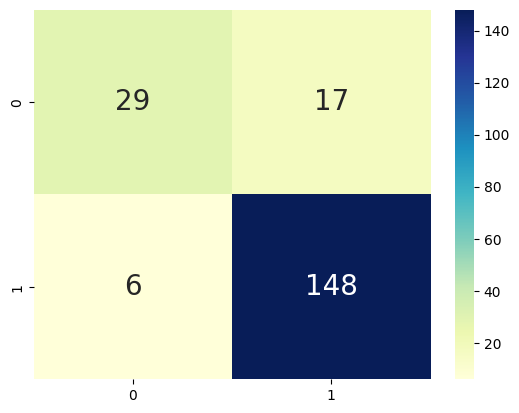

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##NUEVOS DATOS

In [ ]:
PA2 = datos1[(datos1['CÓDIGO'] == 43390801) & (datos1['PERIODO'] == '2023-02')]

PA2 = PA2.dropna()

X_nuevos = PA2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPA2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPA2)

Predicciones para nuevos datos:
 [0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        71
1  No Aprobado         7


________________________________________


#MODELO APLICADO A: PENSAMIENTOSISTÉMICO

In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
# Crear DataFrame datos1
datos2 = datos1.copy()

datos2 .head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
PS = datos2 [(datos2 ['CÓDIGO'] == 43390796) & (datos2 ['PERIODO'] != '2023-02')]
PS.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
20774,NO,2017-02,INGENIERÍA DE SISTEMAS,43390796,PENSAMIENTO SISTÉMICO,1007228578,4.5,4.00,4.00,1,N,NaN,NaN,1
20775,NO,2017-02,INGENIERÍA DE SISTEMAS,43390796,PENSAMIENTO SISTÉMICO,1026305604,4.5,4.00,4.00,1,N,2.260,2.26,1
20776,NO,2017-02,INGENIERÍA DE SISTEMAS,43390796,PENSAMIENTO SISTÉMICO,1026305433,4.5,4.00,4.20,1,N,3.900,3.51,1
20777,NO,2017-02,INGENIERÍA DE SISTEMAS,43390796,PENSAMIENTO SISTÉMICO,1233889107,4.5,3.75,3.85,1,N,0.165,1.16,1
20778,NO,2017-02,INGENIERÍA DE SISTEMAS,43390796,PENSAMIENTO SISTÉMICO,1077479498,4.5,4.25,4.35,1,N,4.350,3.55,1


In [ ]:
PS.shape

(1073, 14)

In [ ]:
PS.isnull().sum()

PLAN 4064                0
PERIODO                  0
CARRERA                  0
CÓDIGO                   0
ASIGNATURA               0
DOCUMENTO ESTUDIANTE     0
NOTAS PRIMER CORTE      23
PROMEDIO PARCIAL         0
DEFINITIVA              79
CALIFICACIÓN             0
ASIGNATURA ANULADA       0
PROMEDIO SEMESTRAL      45
PROMEDIO ACUMULADO      45
TOTAL_MATRICULADOS       0
dtype: int64

In [ ]:
PS= PS.dropna()

In [ ]:
PS.isnull().sum()

PLAN 4064               0
PERIODO                 0
CARRERA                 0
CÓDIGO                  0
ASIGNATURA              0
DOCUMENTO ESTUDIANTE    0
NOTAS PRIMER CORTE      0
PROMEDIO PARCIAL        0
DEFINITIVA              0
CALIFICACIÓN            0
ASIGNATURA ANULADA      0
PROMEDIO SEMESTRAL      0
PROMEDIO ACUMULADO      0
TOTAL_MATRICULADOS      0
dtype: int64

In [ ]:
X = PS[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = PS['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(983, 2) (983,)
(786, 2) (786,)
(197, 2) (197,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9238578680203046
Precision score:  0.9333333333333333
Recall score:  0.9824561403508771
F1 score:  0.9572649572649572


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 14  12]
 [  3 168]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.54      0.65        26
           1       0.93      0.98      0.96       171

    accuracy                           0.92       197
   macro avg       0.88      0.76      0.80       197
weighted avg       0.92      0.92      0.92       197



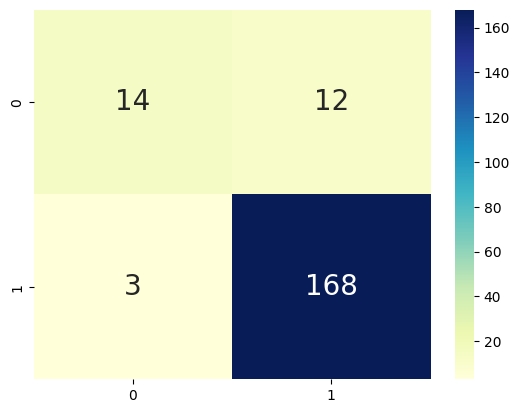

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
PS2 = datos2[(datos2['CÓDIGO'] == 43390796) & (datos1['PERIODO'] == '2023-02')].copy()

In [ ]:
PS2.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
PS2.isnull().sum()

PLAN 4064                0
PERIODO                  0
CARRERA                  0
CÓDIGO                   0
ASIGNATURA               0
DOCUMENTO ESTUDIANTE     0
NOTAS PRIMER CORTE       7
PROMEDIO PARCIAL         0
DEFINITIVA              18
CALIFICACIÓN             0
ASIGNATURA ANULADA       0
PROMEDIO SEMESTRAL      12
PROMEDIO ACUMULADO      12
TOTAL_MATRICULADOS       0
dtype: int64

In [ ]:
PS2 = PS2.dropna()

In [ ]:
PS2.shape

(80, 14)

In [ ]:
X = PS2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = PS2['CALIFICACIÓN']

In [ ]:
X_nuevos = PS2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPS2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPS2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        76
1  No Aprobado         4


##MODELO APLICADO A: PRÁCTICA DE INGENIERÍA I

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTAS PRIMER CORTE',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos3.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
       'DOCUMENTO ESTUDIANTE', 'PROMEDIO PARCIAL', 'DEFINITIVA',
       'CALIFICACIÓN', 'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL',
       'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
PI= datos3 [(datos3 ['CÓDIGO'] == 43390898) & (datos3 ['PERIODO'] != '2023-02')]
PI.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
236,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.2,3.35,1026304845,4.5,4.5,1,N,3.79,3.64,1
237,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,NaN,NaN,1030701648,4.5,4.5,1,N,4.61,3.95,1
238,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.0,3.40,1193548613,4.0,4.0,1,N,4.09,3.87,1
239,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.2,3.40,1026305433,5.0,5.0,1,N,3.90,3.51,1
240,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.0,3.05,1001083571,4.0,4.0,1,N,NaN,NaN,1


In [ ]:
PI.shape

(679, 15)

In [ ]:
PI.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    50
NOTA DEFINITIVA PREREQUISITO 2    68
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
DEFINITIVA                        61
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
PI= PI.dropna()

In [ ]:
PI.shape

(553, 15)

In [ ]:
X = PI[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]#
y = PI['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(553, 3) (553,)
(442, 3) (442,)
(111, 3) (111,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB(var_smoothing=1e-09)
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', precision_score(y_test, y_pred_NB, average='weighted'))  # Se agrega el parámetro 'average' para el caso multiclase
print('Recall score: ', recall_score(y_test, y_pred_NB, average='weighted'))  # Se agrega el parámetro 'average' para el caso multiclase
print('F1 score: ', f1_score(y_test, y_pred_NB, average='weighted'))

Accuracy score:  0.9459459459459459
Precision score:  0.9459459459459459
Recall score:  0.9459459459459459
F1 score:  0.9459459459459459


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de ejemplo (cámbialo por tus propios datos)
X, y = load_iris(return_X_y=True)

# Definir el modelo
model = GaussianNB()

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Inicializar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X, y)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Imprimir la exactitud del mejor modelo
print("Exactitud del mejor modelo:", grid_search.best_score_)


Mejores hiperparámetros encontrados:
{'var_smoothing': 1e-09}
Exactitud del mejor modelo: 0.9533333333333334


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[  3   3]
 [  3 102]]

Classification Report

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.97      0.97      0.97       105

    accuracy                           0.95       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.95      0.95      0.95       111



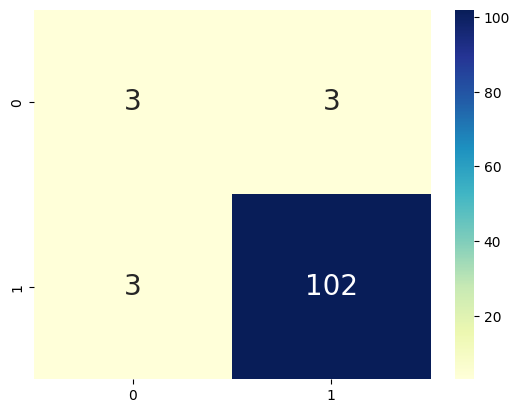

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
PI2 = datos3[(datos3['CÓDIGO'] == 43390898) & (datos3['PERIODO'] == '2023-02')].copy()

PI2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     5
NOTA DEFINITIVA PREREQUISITO 2     8
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
DEFINITIVA                        17
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
PI2 = PI2.dropna()
PI2.shape

(107, 15)

In [ ]:
X = PI2[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = PI2['CALIFICACIÓN']

X_nuevos = PI2[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPI2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPI2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado       103
1  No Aprobado         4


##Predicción Práctica de Ingeniería 1

In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_pa2 = tabla_conteoPA2.loc[tabla_conteoPA2['Resultado'] == 'Aprobado', 'Cantidad'].sum()
aprobados_ps2 = tabla_conteoPS2.loc[tabla_conteoPS2['Resultado'] == 'Aprobado', 'Cantidad'].sum()

# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_pi2 = tabla_conteoPI2.loc[tabla_conteoPI2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': [aprobados_pa2 + aprobados_ps2 + no_aprobados_pi2]}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1         151


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190002.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,1.317800e+04,11349.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.359627e+07,3.649435,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.573066e+05,0.819277,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.210000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339084e+07,3.720000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.200000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 14)

##MODELO APLICADO A: PRÁCTICA DE INGENIERÍA I

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTAS PRIMER CORTE',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos3.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
       'DOCUMENTO ESTUDIANTE', 'PROMEDIO PARCIAL', 'DEFINITIVA',
       'CALIFICACIÓN', 'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL',
       'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
PI= datos3 [(datos3 ['CÓDIGO'] == 43390898) & (datos3 ['PERIODO'] != '2023-02')]
PI.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
236,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.2,3.35,1026304845,4.5,4.5,1,N,3.79,3.64,1
237,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,NaN,NaN,1030701648,4.5,4.5,1,N,4.61,3.95,1
238,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.0,3.40,1193548613,4.0,4.0,1,N,4.09,3.87,1
239,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.2,3.40,1026305433,5.0,5.0,1,N,3.90,3.51,1
240,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,4.0,3.05,1001083571,4.0,4.0,1,N,NaN,NaN,1


In [ ]:
PI.shape

(679, 15)

In [ ]:
PI.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    50
NOTA DEFINITIVA PREREQUISITO 2    68
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
DEFINITIVA                        61
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
PI= PI.dropna()

In [ ]:
PI.shape

(553, 15)

In [ ]:
X = PI[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]#
y = PI['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(553, 3) (553,)
(442, 3) (442,)
(111, 3) (111,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9459459459459459
Precision score:  0.9714285714285714
Recall score:  0.9714285714285714
F1 score:  0.9714285714285714


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[  3   3]
 [  3 102]]

Classification Report

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.97      0.97      0.97       105

    accuracy                           0.95       111
   macro avg       0.74      0.74      0.74       111
weighted avg       0.95      0.95      0.95       111



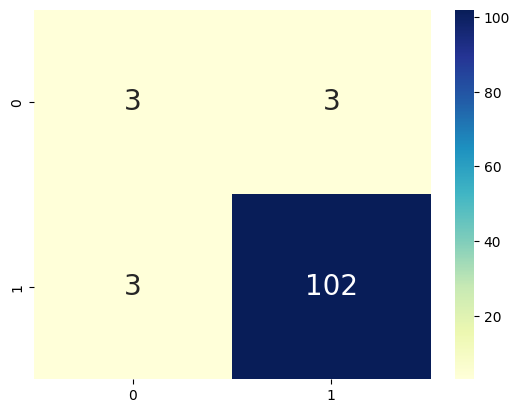

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
PI2 = datos3[(datos3['CÓDIGO'] == 43390898) & (datos3['PERIODO'] == '2023-02')].copy()

PI2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     5
NOTA DEFINITIVA PREREQUISITO 2     8
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
DEFINITIVA                        17
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
PI2 = PI2.dropna()
PI2.shape

(107, 15)

In [ ]:
X = PI2[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]
y = PI2['CALIFICACIÓN']

X_nuevos = PI2[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPI2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPI2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado       103
1  No Aprobado         4


##MODELO APLICADO A: PROGRAMACIÓN ORIENTADA A OBJETOS

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
POO= datos3 [(datos3 ['CÓDIGO'] == 43390843) & (datos3 ['PERIODO'] != '2023-02')]
POO.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,NaN,NaN,1013692387,2.5,2.50,2.50,0,N,4.93,3.88,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.40,3.1,1193548613,4.5,4.00,3.60,1,N,4.09,3.87,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.05,3.9,1001083571,4.0,3.75,3.45,1,N,NaN,NaN,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.00,3.2,1024602262,3.0,2.25,2.35,0,N,1.61,2.69,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,4.25,3.5,1014304950,3.0,3.25,3.15,1,N,4.22,3.68,1


In [ ]:
POO.shape

(822, 16)

In [ ]:
POO.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    78
NOTA DEFINITIVA PREREQUISITO 2    69
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                41
PROMEDIO PARCIAL                   0
DEFINITIVA                        82
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO= POO.dropna()

In [ ]:
POO.shape

(654, 16)

In [ ]:
X = POO[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = POO['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(654, 4) (654,)
(523, 4) (523,)
(131, 4) (131,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.7938931297709924
Precision score:  0.8113207547169812
Recall score:  0.9247311827956989
F1 score:  0.8643216080402009


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[18 20]
 [ 7 86]]

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.81      0.92      0.86        93

    accuracy                           0.79       131
   macro avg       0.77      0.70      0.72       131
weighted avg       0.78      0.79      0.78       131



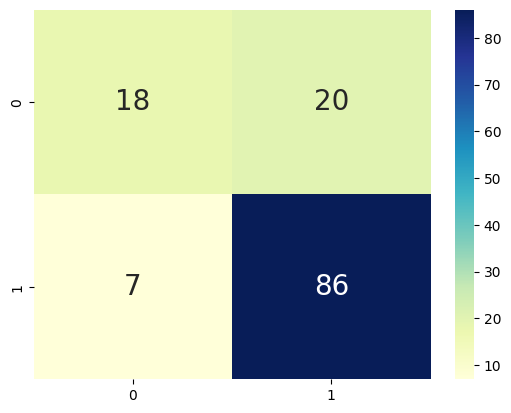

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
POO2 = datos3[(datos3['CÓDIGO'] == 43390843) & (datos3['PERIODO'] == '2023-02')].copy()

POO2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    20
NOTA DEFINITIVA PREREQUISITO 2    12
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 8
PROMEDIO PARCIAL                   0
DEFINITIVA                        13
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO2 = POO2.dropna()
POO2.shape

(105, 16)

In [ ]:
X = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]
y = POO2['CALIFICACIÓN']

X_nuevos = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPOO2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPOO2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        98
1  No Aprobado         7


##MODELO APLICADO A:PRACTICA DE INGENIERÍA 2

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS','NOTAS PRIMER CORTE' ]

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
PII2= datos3 [(datos3 ['CÓDIGO'] == 43390899) & (datos3 ['PERIODO'] != '2023-02')]
PII2.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
456,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,4.00,3.50,1233910274,3.5,3.7,1,N,4.12,3.93,1
457,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,4.00,3.45,1001083571,4.0,4.0,1,N,NaN,NaN,1
458,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,4.00,4.85,1000602748,4.0,3.8,1,N,3.93,3.80,1
459,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,3.40,3.05,1014304109,4.0,4.0,1,N,4.01,3.68,1
460,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,3.75,3.80,1007379516,4.0,4.0,1,N,4.49,3.93,1


In [ ]:
PII2.shape

(84, 15)

In [ ]:
PII2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
NOTA DEFINITIVA PREREQUISITO 2    0
DOCUMENTO ESTUDIANTE              0
PROMEDIO PARCIAL                  0
DEFINITIVA                        0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
PII2= PII2.dropna()

In [ ]:
PII2.shape

(84, 15)

In [ ]:
X = PII2[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = PII2['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(84, 3) (84,)
(67, 3) (67,)
(17, 3) (17,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[17]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



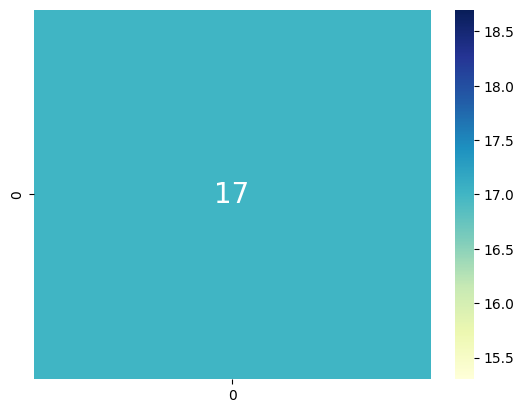

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
PII2 = datos3[(datos3['CÓDIGO'] == 43390899) & (datos3['PERIODO'] == '2023-02')].copy()

PII2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    2
NOTA DEFINITIVA PREREQUISITO 2    4
DOCUMENTO ESTUDIANTE              0
PROMEDIO PARCIAL                  0
DEFINITIVA                        7
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
PII2 = PII2.dropna()
PII2.shape

(84, 15)

In [ ]:
X = PII2[['PROMEDIO ACUMULADO', 'NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]
y = PII2['CALIFICACIÓN']

X_nuevos = PII2[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPII2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPII2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        84
1  No Aprobado         0


##Predicción Práctica de Ingeniería 2

In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_pi1 = tabla_conteoPI2.loc[tabla_conteoPI2['Resultado'] == 'Aprobado', 'Cantidad'].sum()
aprobados_poo2 = tabla_conteoPOO2.loc[tabla_conteoPOO2['Resultado'] == 'Aprobado', 'Cantidad'].sum()

# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_pii2 = tabla_conteoPII2.loc[tabla_conteoPII2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Crear la nueva tabla
datos_nueva_tabla = {'Sementre': ['2024-1'], 'Predicción': [aprobados_pi1 + aprobados_poo2 + no_aprobados_pii2]}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

print(nueva_tabla)


  Sementre  Predicción
0   2024-1         201


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: PROPABILIDAD Y ESTADISTICA

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
PYE= datos3 [(datos3 ['CÓDIGO'] == 45190027) & (datos3 ['PERIODO'] != '2023-02')]
PYE.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
42159,NO,2023-01,INGENIERÍA DE SISTEMAS,45190027,PROBABILIDAD Y ESTADÍSTICA,4.19,1001185590,4.5,4.75,1,N,4.57,4.26,1
42160,NO,2023-01,INGENIERÍA DE SISTEMAS,45190027,PROBABILIDAD Y ESTADÍSTICA,0.75,1026302600,4.7,3.60,1,N,3.01,3.35,2
42161,NO,2023-01,INGENIERÍA DE SISTEMAS,45190027,PROBABILIDAD Y ESTADÍSTICA,NaN,1000831729,4.6,4.55,1,N,NaN,NaN,1
42162,NO,2023-01,INGENIERÍA DE SISTEMAS,45190027,PROBABILIDAD Y ESTADÍSTICA,2.15,1233501641,0.5,0.25,0,N,3.54,2.71,6
42163,NO,2023-01,INGENIERÍA DE SISTEMAS,45190027,PROBABILIDAD Y ESTADÍSTICA,3.21,1016114532,3.4,3.70,1,N,3.68,3.66,1


In [ ]:
PYE.shape

(701, 14)

In [ ]:
PYE.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     91
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  7
PROMEDIO PARCIAL                    0
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                103
PROMEDIO ACUMULADO                103
TOTAL_MATRICULADOS                  0
dtype: int64

In [ ]:
PYE= PYE.dropna()

In [ ]:
PYE.shape

(517, 14)

In [ ]:
X = PYE[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = PYE['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(517, 3) (517,)
(413, 3) (413,)
(104, 3) (104,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9038461538461539
Precision score:  0.9130434782608695
Recall score:  0.9767441860465116
F1 score:  0.9438202247191011


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[10  8]
 [ 2 84]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.56      0.67        18
           1       0.91      0.98      0.94        86

    accuracy                           0.90       104
   macro avg       0.87      0.77      0.81       104
weighted avg       0.90      0.90      0.90       104



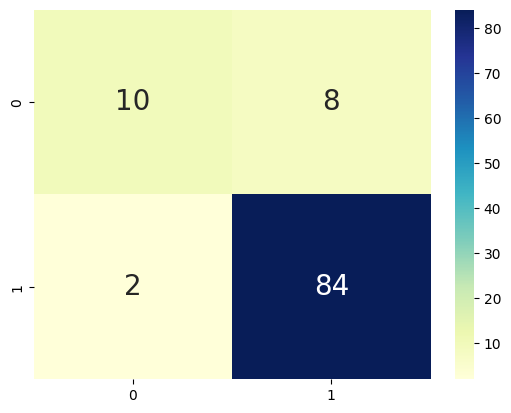

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
PYE2 = datos3[(datos3['CÓDIGO'] == 45190027) & (datos3['PERIODO'] == '2023-02')].copy()

PYE2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    1
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                1
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
PYE2 = PYE2.dropna()
PYE2.shape

(35, 14)

In [ ]:
X = PYE2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = PYE2['CALIFICACIÓN']

X_nuevos = PYE2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPYE2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPYE2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0]
     Resultado  Cantidad
0     Aprobado        27
1  No Aprobado         8


In [ ]:
PYE2['CARRERA'].value_counts()

CARRERA
INGENIERÍA DE SISTEMAS    35
Name: count, dtype: int64

<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,1.317800e+04,11349.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.359627e+07,3.649435,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.573066e+05,0.819277,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.210000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339084e+07,3.720000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.200000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(44575, 14)

## PREDICCIÓN DE PROGRAMACIÓN ORIENTADA A OBJETOS, BASADOS EN LOS PRERREQUISITOS PENSAMIENTO ALGORÍTMICO Y LÓGICA MATEMÁTICA

In [ ]:
PA = datos1[(datos1['CÓDIGO'] == 43390801) & (datos1['PERIODO'] != '2023-02')]
PA.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
20837,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1056805955,3.0,3.00,3.60,1,N,4.27,3.64,1
20838,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1233503069,3.0,2.75,3.05,1,N,1.15,2.61,1
20839,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1013689152,3.5,3.50,3.30,1,N,0.78,1.96,1
20840,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1077479498,3.0,2.75,2.45,0,N,4.35,3.55,2
20841,NO,2017-02,INGENIERÍA DE SISTEMAS,43390801,PENSAMIENTO ALGORÍTMICO,1023963033,3.0,2.50,2.70,0,N,2.85,2.77,2


In [ ]:
PA.shape

(1097, 14)

In [ ]:
PA.isnull().sum()

PLAN 4064                0
PERIODO                  0
CARRERA                  0
CÓDIGO                   0
ASIGNATURA               0
DOCUMENTO ESTUDIANTE     0
NOTAS PRIMER CORTE      25
PROMEDIO PARCIAL         0
DEFINITIVA              84
CALIFICACIÓN             0
ASIGNATURA ANULADA       0
PROMEDIO SEMESTRAL      45
PROMEDIO ACUMULADO      45
TOTAL_MATRICULADOS       0
dtype: int64

In [ ]:
PA = PA.dropna()

In [ ]:
PA.shape

(999, 14)

In [ ]:
PA.isnull().sum()

PLAN 4064               0
PERIODO                 0
CARRERA                 0
CÓDIGO                  0
ASIGNATURA              0
DOCUMENTO ESTUDIANTE    0
NOTAS PRIMER CORTE      0
PROMEDIO PARCIAL        0
DEFINITIVA              0
CALIFICACIÓN            0
ASIGNATURA ANULADA      0
PROMEDIO SEMESTRAL      0
PROMEDIO ACUMULADO      0
TOTAL_MATRICULADOS      0
dtype: int64

In [ ]:
X = PA[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = PA['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(999, 2) (999,)
(799, 2) (799,)
(200, 2) (200,)


### Modelo Naive-bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.885
Precision score:  0.896969696969697
Recall score:  0.961038961038961
F1 score:  0.9278996865203761


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 29  17]
 [  6 148]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        46
           1       0.90      0.96      0.93       154

    accuracy                           0.89       200
   macro avg       0.86      0.80      0.82       200
weighted avg       0.88      0.89      0.88       200



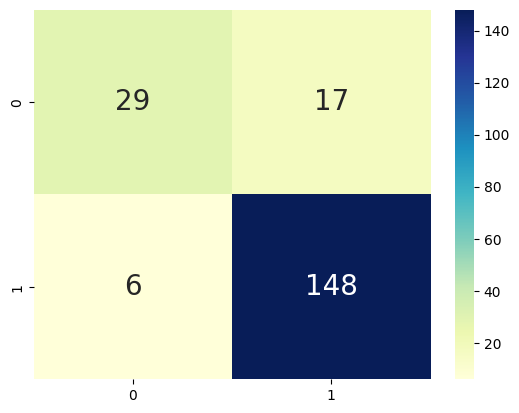

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##NUEVOS DATOS

In [ ]:
PA2 = datos1[(datos1['CÓDIGO'] == 43390801) & (datos1['PERIODO'] == '2023-02')]

PA2 = PA2.dropna()

X_nuevos = PA2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPA2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPA2)

Predicciones para nuevos datos:
 [0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        71
1  No Aprobado         7


________________________________________


#MODELO APLICADO A: LÓGICA MATEMÁTICA

In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
# Crear DataFrame datos1
datos2 = datos1.copy()

datos2 .head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
LM = datos2 [(datos2 ['CÓDIGO'] == 43390842) & (datos2 ['PERIODO'] != '2023-02')]
LM.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
20900,NO,2017-02,INGENIERÍA DE SISTEMAS,43390842,LÓGICA MATEMÁTICA,1032504519,4.0,4.50,4.10,1,N,4.40,3.87,1
20901,NO,2017-02,INGENIERÍA DE SISTEMAS,43390842,LÓGICA MATEMÁTICA,1233503069,4.0,4.00,3.60,1,N,1.15,2.61,1
20902,NO,2017-02,INGENIERÍA DE SISTEMAS,43390842,LÓGICA MATEMÁTICA,1012462139,2.5,2.25,2.55,0,N,4.05,3.70,4
20903,NO,2017-02,INGENIERÍA DE SISTEMAS,43390842,LÓGICA MATEMÁTICA,1022443907,2.5,2.50,2.70,0,N,3.13,3.13,1
20904,NO,2017-02,INGENIERÍA DE SISTEMAS,43390842,LÓGICA MATEMÁTICA,1012460327,3.5,3.25,3.15,1,N,2.82,3.02,1


In [ ]:
LM.shape

(1159, 14)

In [ ]:
LM.isnull().sum()

PLAN 4064                 0
PERIODO                   0
CARRERA                   0
CÓDIGO                    0
ASIGNATURA                0
DOCUMENTO ESTUDIANTE      0
NOTAS PRIMER CORTE       33
PROMEDIO PARCIAL          0
DEFINITIVA              104
CALIFICACIÓN              0
ASIGNATURA ANULADA        0
PROMEDIO SEMESTRAL       56
PROMEDIO ACUMULADO       56
TOTAL_MATRICULADOS        0
dtype: int64

In [ ]:
LM= LM.dropna()

In [ ]:
LM.isnull().sum()

PLAN 4064               0
PERIODO                 0
CARRERA                 0
CÓDIGO                  0
ASIGNATURA              0
DOCUMENTO ESTUDIANTE    0
NOTAS PRIMER CORTE      0
PROMEDIO PARCIAL        0
DEFINITIVA              0
CALIFICACIÓN            0
ASIGNATURA ANULADA      0
PROMEDIO SEMESTRAL      0
PROMEDIO ACUMULADO      0
TOTAL_MATRICULADOS      0
dtype: int64

In [ ]:
X = LM[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = LM['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1042, 2) (1042,)
(833, 2) (833,)
(209, 2) (209,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.9186602870813397
Precision score:  0.9408284023668639
Recall score:  0.9578313253012049
F1 score:  0.9492537313432836


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 33  10]
 [  7 159]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.77      0.80        43
           1       0.94      0.96      0.95       166

    accuracy                           0.92       209
   macro avg       0.88      0.86      0.87       209
weighted avg       0.92      0.92      0.92       209



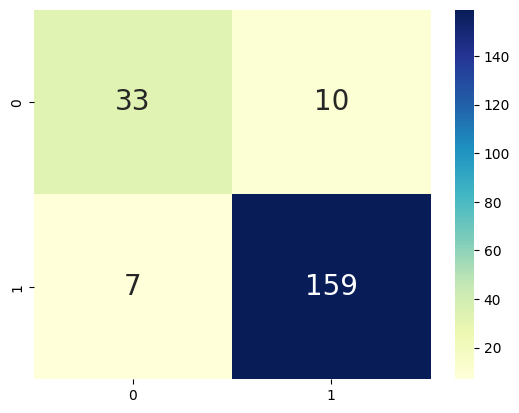

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

##Nuevos datos

In [ ]:
LM2 = datos2[(datos2['CÓDIGO'] == 43390842) & (datos1['PERIODO'] == '2023-02')].copy()

In [ ]:
LM2.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
LM2.isnull().sum()

PLAN 4064                0
PERIODO                  0
CARRERA                  0
CÓDIGO                   0
ASIGNATURA               0
DOCUMENTO ESTUDIANTE     0
NOTAS PRIMER CORTE       9
PROMEDIO PARCIAL         0
DEFINITIVA              24
CALIFICACIÓN             0
ASIGNATURA ANULADA       0
PROMEDIO SEMESTRAL      11
PROMEDIO ACUMULADO      11
TOTAL_MATRICULADOS       0
dtype: int64

In [ ]:
LM2 = LM2.dropna()

In [ ]:
LM2.shape

(77, 14)

In [ ]:
X = LM2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = LM2['CALIFICACIÓN']

In [ ]:
X_nuevos = LM2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoLM2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoLM2)

Predicciones para nuevos datos:
 [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 0 0]
     Resultado  Cantidad
0     Aprobado        62
1  No Aprobado        15


##MODELO APLICADO A: PROGRAMACIÓN ORIENTADA A OBJETOS

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,NaN,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


In [ ]:
datos3.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
       'DOCUMENTO ESTUDIANTE', 'NOTAS PRIMER CORTE', 'PROMEDIO PARCIAL',
       'DEFINITIVA', 'CALIFICACIÓN', 'ASIGNATURA ANULADA',
       'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
POO= datos3 [(datos3 ['CÓDIGO'] == 43390843) & (datos3 ['PERIODO'] != '2023-02')]
POO.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,NaN,NaN,1013692387,2.5,2.50,2.50,0,N,4.93,3.88,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.40,3.1,1193548613,4.5,4.00,3.60,1,N,4.09,3.87,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.05,3.9,1001083571,4.0,3.75,3.45,1,N,NaN,NaN,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.00,3.2,1024602262,3.0,2.25,2.35,0,N,1.61,2.69,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,4.25,3.5,1014304950,3.0,3.25,3.15,1,N,4.22,3.68,1


In [ ]:
POO.shape

(822, 16)

In [ ]:
POO.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    78
NOTA DEFINITIVA PREREQUISITO 2    69
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                41
PROMEDIO PARCIAL                   0
DEFINITIVA                        82
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO= POO.dropna()

In [ ]:
POO.shape

(654, 16)

In [ ]:
X = POO[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = POO['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(654, 4) (654,)
(523, 4) (523,)
(131, 4) (131,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.7938931297709924
Precision score:  0.8113207547169812
Recall score:  0.9247311827956989
F1 score:  0.8643216080402009


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[18 20]
 [ 7 86]]

Classification Report

              precision    recall  f1-score   support

           0       0.72      0.47      0.57        38
           1       0.81      0.92      0.86        93

    accuracy                           0.79       131
   macro avg       0.77      0.70      0.72       131
weighted avg       0.78      0.79      0.78       131



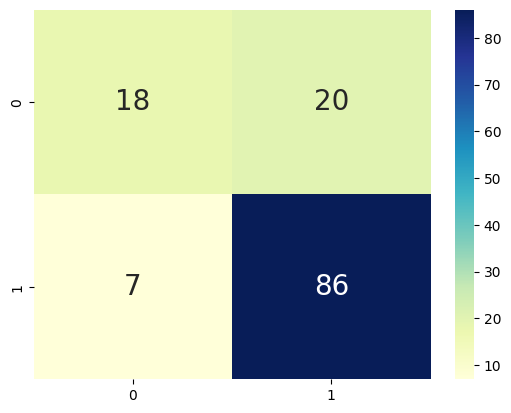

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
POO2 = datos3[(datos3['CÓDIGO'] == 43390843) & (datos3['PERIODO'] == '2023-02')].copy()

POO2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    20
NOTA DEFINITIVA PREREQUISITO 2    12
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 8
PROMEDIO PARCIAL                   0
DEFINITIVA                        13
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
POO2 = POO2.dropna()
POO2.shape

(105, 16)

In [ ]:
X = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]
y = POO2['CALIFICACIÓN']

X_nuevos = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPOO2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoPOO2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        98
1  No Aprobado         7


##Predicción Programación Orientada a Objetos

In [ ]:
# Sumar los Aprobados de tabla_conteoPA2 y tabla_conteoLM2
aprobados_pa2 = tabla_conteoPA2.loc[tabla_conteoPA2['Resultado'] == 'Aprobado', 'Cantidad'].sum()
aprobados_lm2 = tabla_conteoLM2.loc[tabla_conteoLM2['Resultado'] == 'Aprobado', 'Cantidad'].sum()

# Sumar los No Aprobados de tabla_conteoPOO2
no_aprobados_poo2 = tabla_conteoPOO2.loc[tabla_conteoPOO2['Resultado'] == 'No Aprobado', 'Cantidad'].sum()

# Calcular la suma total
suma_total = aprobados_pa2 + aprobados_lm2 + no_aprobados_poo2

# Dividir la suma total entre dos y convertirlo a entero
prediccion_dividida = int(suma_total / 2)

# Crear la nueva tabla
datos_nueva_tabla = {'Semestre': ['2024-1'], 'Predicción': [prediccion_dividida]}
nueva_tabla = pd.DataFrame(datos_nueva_tabla)

# Esta asignatura habilita 2 asignaturas más por tal motivo se divide en 2
print(nueva_tabla)


  Semestre  Predicción
0   2024-1          70


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: REDES DE COMPUTADORES

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
RPC= datos3 [(datos3 ['CÓDIGO'] == 43390858) & (datos3 ['PERIODO'] != '2023-02')]
RPC.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
6836,SI,2023-01,INGENIERÍA DE SISTEMAS,43390858,REDES DE COMPUTADORES,4.39,1000255538,4.3,4.20,1,N,4.19,3.91,1
6837,SI,2023-01,INGENIERÍA DE SISTEMAS,43390858,REDES DE COMPUTADORES,3.64,1000254172,4.0,3.75,1,N,3.79,3.44,1
6838,SI,2023-01,INGENIERÍA DE SISTEMAS,43390858,REDES DE COMPUTADORES,4.45,1016061656,4.5,4.50,1,N,4.18,3.74,1
6839,SI,2023-01,INGENIERÍA DE SISTEMAS,43390858,REDES DE COMPUTADORES,4.65,1000160794,3.9,4.15,1,N,4.35,4.04,1
6840,SI,2023-01,INGENIERÍA DE SISTEMAS,43390858,REDES DE COMPUTADORES,4.43,1026303449,3.6,3.00,0,N,3.09,3.22,3


In [ ]:
RPC.shape

(173, 14)

In [ ]:
RPC.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     0
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                13
PROMEDIO ACUMULADO                13
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
RPC= RPC.dropna()

In [ ]:
RPC.shape

(159, 14)

In [ ]:
X = RPC[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = RPC['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(159, 3) (159,)
(127, 3) (127,)
(32, 3) (32,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  0.96875
Precision score:  0.96875
Recall score:  1.0
F1 score:  0.9841269841269841


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[ 0  1]
 [ 0 31]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.98        31

    accuracy                           0.97        32
   macro avg       0.48      0.50      0.49        32
weighted avg       0.94      0.97      0.95        32



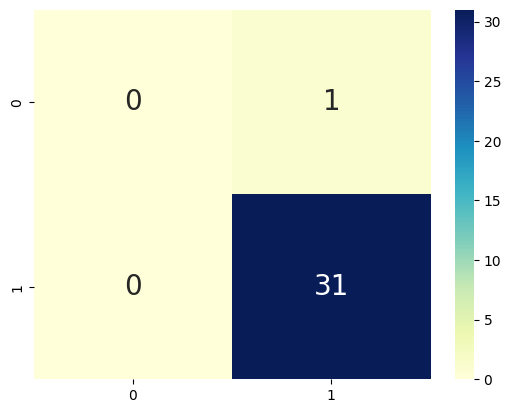

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
RPC2 = datos3[(datos3['CÓDIGO'] == 43390858) & (datos3['PERIODO'] == '2023-02')].copy()

RPC2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    1
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                1
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
RPC2 = RPC2.dropna()
RPC2.shape

(31, 14)

In [ ]:
X = RPC2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = RPC2['CALIFICACIÓN']

X_nuevos = RPC2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoRPC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo[1], conteo[0]]})

print(tabla_conteoRPC2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        30
1  No Aprobado         1


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

# <FONT COLOR="purple"> Clasificación Desarrollo </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris


## 1 Cargar los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx") #Lau

## 2. Hacer una exploración de los datos.

Limpieza

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()


datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.5,3.5,3.7,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,2.0,3.0,3.8,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.0,2.5,2.1,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.5,3.0,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,4.0,4.0,3.6,1,N,4.08,3.77,1


##MODELO APLICADO A: ARQUITECTURA DE SISTEMAS II

In [ ]:
datos3=datos.copy()
datos3.shape

(44575, 42)

In [ ]:
datos3=datos.copy()

datos3['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos3['CALIFICACIÓN'].fillna('NS', inplace=True)

datos3['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos3['TOTAL_MATRICULADOS'] = datos3.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas(En este caso eliminamos los prerrequisitos porque no tienen estas asignaturas)
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE','PREREQUISITO1_ASIGNATURA','DEFINITIVA',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos3 = datos3.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos3.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1016014851,3.5,3.5,1,N,3.69,3.71,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1026289722,2.0,3.0,1,N,4.05,3.49,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022327856,2.0,2.5,0,N,3.20,3.47,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1010205208,3.5,3.0,1,N,4.00,3.54,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,NaN,1022385102,4.0,4.0,1,N,4.08,3.77,1


In [ ]:
SD= datos3 [(datos3 ['CÓDIGO'] == 43390862) & (datos3 ['PERIODO'] != '2023-02')]
SD.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,TOTAL_MATRICULADOS
6971,SI,2023-01,INGENIERÍA DE SISTEMAS,43390862,SISTEMAS DISTRIBUIDOS,4.50,79781491,4.8,4.85,1,N,4.50,3.96,1
6972,SI,2023-01,INGENIERÍA DE SISTEMAS,43390862,SISTEMAS DISTRIBUIDOS,4.35,1032507781,4.6,4.40,1,N,4.43,3.87,1
6973,SI,2023-01,INGENIERÍA DE SISTEMAS,43390862,SISTEMAS DISTRIBUIDOS,3.63,1026600038,2.8,2.85,1,N,2.63,3.10,1
6974,SI,2023-01,INGENIERÍA DE SISTEMAS,43390862,SISTEMAS DISTRIBUIDOS,3.92,1000618548,4.6,4.15,1,N,3.93,3.73,1
6975,SI,2023-01,INGENIERÍA DE SISTEMAS,43390862,SISTEMAS DISTRIBUIDOS,3.91,1015472505,4.3,4.15,1,N,4.00,3.34,1


In [ ]:
SD.shape

(133, 14)

In [ ]:
SD.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    22
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                11
PROMEDIO ACUMULADO                11
TOTAL_MATRICULADOS                 0
dtype: int64

In [ ]:
SD= SD.dropna()

In [ ]:
SD.shape

(100, 14)

In [ ]:
X = SD[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = SD['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 3) (100,)
(80, 3) (80,)
(20, 3) (20,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = naive_bayes.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_NB)))
print('Precision score: ', format(precision_score(y_test, y_pred_NB)))
print('Recall score: ', format(recall_score(y_test, y_pred_NB)))
print('F1 score: ', format(f1_score(y_test, y_pred_NB)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
confusion = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_NB))

Confusion Matrix

[[20]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



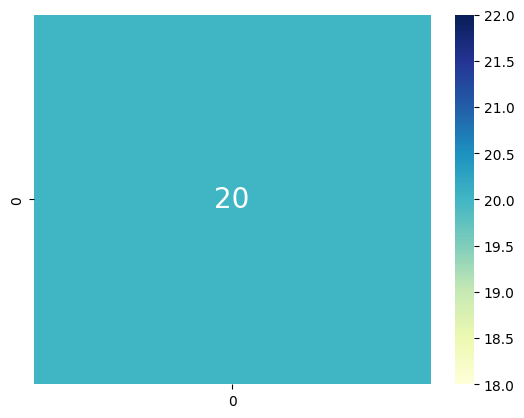

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_NB)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


#Nuevos datos

In [ ]:
SD2 = datos3[(datos3['CÓDIGO'] == 43390862) & (datos3['PERIODO'] == '2023-02')].copy()

SD2.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    4
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
TOTAL_MATRICULADOS                0
dtype: int64

In [ ]:
SD2 = SD2.dropna()
SD2.shape

(21, 14)

In [ ]:
X = SD2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = SD2['CALIFICACIÓN']

X_nuevos = SD2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = naive_bayes.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones y asignar un índice numérico
resultados = pd.DataFrame({'Predicción': y_pred_nuevos}, index=X_nuevos.index)

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoSD2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoSD2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        21
1  No Aprobado         0
